# Transport 

In [1743]:
#Import libraries
import pandas as pd
import numpy as np
import os 
import seaborn as  sns
import math
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' 
import scipy.stats as ss
from scipy.special import comb
import calendar
import plotly.express as px

In [1744]:
from PIL import Image

# Transportation in Ireland, Norway and New Zealand 

(-0.5, 2047.5, 1023.5, -0.5)

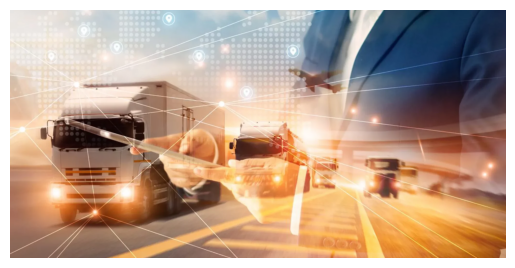

In [1745]:
imagen= mpimg.imread('Transport.jpg')
plt.imshow(imagen)
plt.axis('off')
  
plt.show()

In [1746]:
#Import DataBases

IRL= pd.read_csv("Plublic Transport Ireland.csv")
IRLuas= pd.read_csv("TOA11 - Luas Passenger Numbers Ireland.csv")
IRLFM=pd.read_csv("Trail Trafict Ireland.csv")
IRF=pd.read_csv("Ireland Ferry.csv")

#Additional Countries
NRWW = pd.read_excel("NORWAY.xlsx")
NZL= pd.read_csv("PT005 - Public transport boardings by mode New Zealand.csv")

#Population
PI=pd.read_csv("PP Ireland.csv")
PN=pd.read_excel("PP Norway.xlsx")
PNZ=pd.read_excel("PP NZ.xlsx")

# Structure of dataframe

In [1747]:
#First Database
IRL.head()

,STATISTIC,Statistic Label,TLIST(W1),Week,C03935V04687,Mode of Transport,UNIT,VALUE
0,THA25C01,Passenger Journeys,2019W01,2019 Week 01,10,Dublin Metro Bus,Number,1987891.0
1,THA25C01,Passenger Journeys,2019W01,2019 Week 01,20,"Bus, excluding Dublin Metro",Number,497598.0
2,THA25C01,Passenger Journeys,2019W01,2019 Week 01,30,Rail,Number,NaN
3,THA25C01,Passenger Journeys,2019W01,2019 Week 01,40,"All public transport, excluding LUAS",Number,2485489.0
4,THA25C01,Passenger Journeys,2019W02,2019 Week 02,10,Dublin Metro Bus,Number,2709579.0


In [1748]:
IRL.info

<bound method DataFrame.info of      STATISTIC     Statistic Label TLIST(W1)          Week  C03935V04687  \
0     THA25C01  Passenger Journeys   2019W01  2019 Week 01            10   
1     THA25C01  Passenger Journeys   2019W01  2019 Week 01            20   
2     THA25C01  Passenger Journeys   2019W01  2019 Week 01            30   
3     THA25C01  Passenger Journeys   2019W01  2019 Week 01            40   
4     THA25C01  Passenger Journeys   2019W02  2019 Week 02            10   
...        ...                 ...       ...           ...           ...   
1019  THA25C01  Passenger Journeys   2023W43  2023 Week 43            40   
1020  THA25C01  Passenger Journeys   2023W44  2023 Week 44            10   
1021  THA25C01  Passenger Journeys   2023W44  2023 Week 44            20   
1022  THA25C01  Passenger Journeys   2023W44  2023 Week 44            30   
1023  THA25C01  Passenger Journeys   2023W44  2023 Week 44            40   

                         Mode of Transport    UNIT     

In [1749]:
IRL.describe()

,C03935V04687,VALUE
count,1024.000000,9.600000e+02
mean,25.000000,1.740812e+06
std,11.185803,1.423490e+06
min,10.000000,2.323100e+04
25%,17.500000,6.121042e+05
50%,25.000000,9.495040e+05
75%,32.500000,2.982254e+06
max,40.000000,5.488658e+06


In [1750]:
IRL.dtypes

STATISTIC             object
Statistic Label       object
TLIST(W1)             object
Week                  object
C03935V04687           int64
Mode of Transport     object
UNIT                  object
VALUE                float64
dtype: object

#  Checking for Missing Values and Inputing Them

In [1751]:
IRL.isnull()

,STATISTIC,Statistic Label,TLIST(W1),Week,C03935V04687,Mode of Transport,UNIT,VALUE
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1019,False,False,False,False,False,False,False,False
1020,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False


In [1752]:
IRL.isnull().sum()

STATISTIC             0
Statistic Label       0
TLIST(W1)             0
Week                  0
C03935V04687          0
Mode of Transport     0
UNIT                  0
VALUE                64
dtype: int64

In [1753]:
IRL.fillna(0, inplace=True)
IRL.isnull()

,STATISTIC,Statistic Label,TLIST(W1),Week,C03935V04687,Mode of Transport,UNIT,VALUE
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1019,False,False,False,False,False,False,False,False
1020,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False


In [1754]:
IRL.isnull().sum()

STATISTIC            0
Statistic Label      0
TLIST(W1)            0
Week                 0
C03935V04687         0
Mode of Transport    0
UNIT                 0
VALUE                0
dtype: int64

In [1755]:
print(IRL['Mode of Transport'].head())

0                        Dublin Metro Bus
1             Bus, excluding Dublin Metro
2                                    Rail
3    All public transport, excluding LUAS
4                        Dublin Metro Bus
Name: Mode of Transport, dtype: object


In [1756]:
IRL.head()

,STATISTIC,Statistic Label,TLIST(W1),Week,C03935V04687,Mode of Transport,UNIT,VALUE
0,THA25C01,Passenger Journeys,2019W01,2019 Week 01,10,Dublin Metro Bus,Number,1987891.0
1,THA25C01,Passenger Journeys,2019W01,2019 Week 01,20,"Bus, excluding Dublin Metro",Number,497598.0
2,THA25C01,Passenger Journeys,2019W01,2019 Week 01,30,Rail,Number,0.0
3,THA25C01,Passenger Journeys,2019W01,2019 Week 01,40,"All public transport, excluding LUAS",Number,2485489.0
4,THA25C01,Passenger Journeys,2019W02,2019 Week 02,10,Dublin Metro Bus,Number,2709579.0


In [1757]:
IRL= IRL[IRL['Mode of Transport'] != 'All public transport, excluding LUAS']
IRL.head()

,STATISTIC,Statistic Label,TLIST(W1),Week,C03935V04687,Mode of Transport,UNIT,VALUE
0,THA25C01,Passenger Journeys,2019W01,2019 Week 01,10,Dublin Metro Bus,Number,1987891.0
1,THA25C01,Passenger Journeys,2019W01,2019 Week 01,20,"Bus, excluding Dublin Metro",Number,497598.0
2,THA25C01,Passenger Journeys,2019W01,2019 Week 01,30,Rail,Number,0.0
4,THA25C01,Passenger Journeys,2019W02,2019 Week 02,10,Dublin Metro Bus,Number,2709579.0
5,THA25C01,Passenger Journeys,2019W02,2019 Week 02,20,"Bus, excluding Dublin Metro",Number,633764.0


In [1758]:
print(IRL['Mode of Transport'].head())

0               Dublin Metro Bus
1    Bus, excluding Dublin Metro
2                           Rail
4               Dublin Metro Bus
5    Bus, excluding Dublin Metro
Name: Mode of Transport, dtype: object


# Group by Year

In [1759]:
IRL['Year'] = IRL['Week'].str.slice(0, 4)  # to get the first 4 characters (year)
IRL['Week_Number'] = IRL['Week'].str.slice(-2)  # Last 2 characters (week number)
IRL['Week_Number'] = IRL['Week_Number'].astype(int)  # Convert to integer type
IRL.head()

,STATISTIC,Statistic Label,TLIST(W1),Week,C03935V04687,Mode of Transport,UNIT,VALUE,Year,Week_Number
0,THA25C01,Passenger Journeys,2019W01,2019 Week 01,10,Dublin Metro Bus,Number,1987891.0,2019,1
1,THA25C01,Passenger Journeys,2019W01,2019 Week 01,20,"Bus, excluding Dublin Metro",Number,497598.0,2019,1
2,THA25C01,Passenger Journeys,2019W01,2019 Week 01,30,Rail,Number,0.0,2019,1
4,THA25C01,Passenger Journeys,2019W02,2019 Week 02,10,Dublin Metro Bus,Number,2709579.0,2019,2
5,THA25C01,Passenger Journeys,2019W02,2019 Week 02,20,"Bus, excluding Dublin Metro",Number,633764.0,2019,2


In [1760]:
IRL['Week'] = IRL['Year'].astype(str) + ' ' + IRL['Week_Number'].astype(str)
IRL['Date'] = pd.to_datetime(IRL['Week'] + ' 0', format='%Y %U %w')
IRL['Month'] = IRL['Date'].dt.month.apply(lambda x: calendar.month_name[x])
IRL.head()

,STATISTIC,Statistic Label,TLIST(W1),Week,C03935V04687,Mode of Transport,UNIT,VALUE,Year,Week_Number,Date,Month
0,THA25C01,Passenger Journeys,2019W01,2019 1,10,Dublin Metro Bus,Number,1987891.0,2019,1,2019-01-06,January
1,THA25C01,Passenger Journeys,2019W01,2019 1,20,"Bus, excluding Dublin Metro",Number,497598.0,2019,1,2019-01-06,January
2,THA25C01,Passenger Journeys,2019W01,2019 1,30,Rail,Number,0.0,2019,1,2019-01-06,January
4,THA25C01,Passenger Journeys,2019W02,2019 2,10,Dublin Metro Bus,Number,2709579.0,2019,2,2019-01-13,January
5,THA25C01,Passenger Journeys,2019W02,2019 2,20,"Bus, excluding Dublin Metro",Number,633764.0,2019,2,2019-01-13,January


In [1761]:
IRL_Total = IRL.groupby(['Year','Mode of Transport', 'Month']).agg({'VALUE': 'sum'}).reset_index()
IRL_Total.head()

,Year,Mode of Transport,Month,VALUE
0,2019,"Bus, excluding Dublin Metro",April,2681041.0
1,2019,"Bus, excluding Dublin Metro",August,2684969.0
2,2019,"Bus, excluding Dublin Metro",December,3633236.0
3,2019,"Bus, excluding Dublin Metro",February,2783538.0
4,2019,"Bus, excluding Dublin Metro",January,2485599.0


# Second database 

In [1762]:
IRLuas.head()

,STATISTIC,Statistic Label,TLIST(A1),Year,C01885V02316,Month,UNIT,VALUE
0,TOA11C01,Red line,2018,2018,1,January,Number,1664495
1,TOA11C01,Red line,2018,2018,2,February,Number,1657562
2,TOA11C01,Red line,2018,2018,3,March,Number,1661098
3,TOA11C01,Red line,2018,2018,4,April,Number,1794424
4,TOA11C01,Red line,2018,2018,5,May,Number,1934553


In [1763]:
print(IRLuas['Statistic Label'].head())

0    Red line
1    Red line
2    Red line
3    Red line
4    Red line
Name: Statistic Label, dtype: object


In [1764]:
IRL_2 = IRLuas[['Statistic Label','Year','Month','VALUE']]

In [1765]:
IRL_2=IRL_2[IRL_2["Year"].astype("int64")>=2019]
IRL_2.head()

,Statistic Label,Year,Month,VALUE
13,Red line,2019,January,1747263
14,Red line,2019,February,1846358
15,Red line,2019,March,2052087
16,Red line,2019,April,1916485
17,Red line,2019,May,1992879


In [1766]:
IRL_T= IRL_2[IRL_2['Statistic Label'] == 'All Luas lines']

In [1767]:
IRL_T= IRL_T[IRL_T['Month'] != 'All months']

In [1768]:
IRL_T=IRL_T.rename (columns= {'Statistic Label':'Mode of Transport'})
IRL_T.head()

,Mode of Transport,Year,Month,VALUE
143,All Luas lines,2019,January,3658484
144,All Luas lines,2019,February,3727609
145,All Luas lines,2019,March,4069124
146,All Luas lines,2019,April,3826763
147,All Luas lines,2019,May,4003472


# Concatenate 2 dataframes

In [1769]:
Ireland = pd.concat([IRL_Total, IRL_T], ignore_index=True)
Ireland

,Year,Mode of Transport,Month,VALUE
0,2019,"Bus, excluding Dublin Metro",April,2681041.0
1,2019,"Bus, excluding Dublin Metro",August,2684969.0
2,2019,"Bus, excluding Dublin Metro",December,3633236.0
3,2019,"Bus, excluding Dublin Metro",February,2783538.0
4,2019,"Bus, excluding Dublin Metro",January,2485599.0
...,...,...,...,...
217,2022,All Luas lines,August,3292231.0
218,2022,All Luas lines,September,3811093.0
219,2022,All Luas lines,October,4219124.0
220,2022,All Luas lines,November,4375705.0


In [1770]:
Ireland.isnull()

,Year,Mode of Transport,Month,VALUE
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
217,False,False,False,False
218,False,False,False,False
219,False,False,False,False
220,False,False,False,False


In [1771]:
Ireland.isnull().sum()

Year                 0
Mode of Transport    0
Month                0
VALUE                0
dtype: int64

In [1772]:
Transport_M = Ireland['Mode of Transport'].value_counts()
Transport_M

Bus, excluding Dublin Metro    58
Dublin Metro Bus               58
Rail                           58
All Luas lines                 48
Name: Mode of Transport, dtype: int64

In [1773]:
mapping = {
    'All Luas lines': 'Luas',
    'Bus, excluding Dublin Metro':'Bus',
    'Dublin Metro Bus': 'Metro Bus',}

Ireland['Mode of Transport'] = Ireland['Mode of Transport'].replace(mapping)

In [1774]:
Ireland

,Year,Mode of Transport,Month,VALUE
0,2019,Bus,April,2681041.0
1,2019,Bus,August,2684969.0
2,2019,Bus,December,3633236.0
3,2019,Bus,February,2783538.0
4,2019,Bus,January,2485599.0
...,...,...,...,...
217,2022,Luas,August,3292231.0
218,2022,Luas,September,3811093.0
219,2022,Luas,October,4219124.0
220,2022,Luas,November,4375705.0


In [1775]:
def Quarter(month):
    if month in ['January', 'February', 'March']:
        return 'K1'
    elif month in ['April','May', 'June']:
        return 'K2'
    elif month in ['July', 'August','September']:
        return 'K3'
    elif month in ['October', 'November', 'December']:
        return 'K4'
Ireland['Quarter'] = Ireland['Month'].apply(Quarter)
Ireland

,Year,Mode of Transport,Month,VALUE,Quarter
0,2019,Bus,April,2681041.0,K2
1,2019,Bus,August,2684969.0,K3
2,2019,Bus,December,3633236.0,K4
3,2019,Bus,February,2783538.0,K1
4,2019,Bus,January,2485599.0,K1
...,...,...,...,...,...
217,2022,Luas,August,3292231.0,K3
218,2022,Luas,September,3811093.0,K3
219,2022,Luas,October,4219124.0,K4
220,2022,Luas,November,4375705.0,K4


In [1776]:
Ireland = Ireland.groupby(['Year', 'Mode of Transport', 'Quarter'])['VALUE'].sum().reset_index()

In [1777]:
Ireland['VALUE'] = (Ireland['VALUE'] / 1000).round(2)
Ireland

,Year,Mode of Transport,Quarter,VALUE
0,2019,Luas,K1,11455.22
1,2019,Luas,K2,11580.96
2,2019,Luas,K3,12078.81
3,2019,Luas,K4,13232.25
4,2020,Luas,K1,9520.41
...,...,...,...,...
71,2023,Metro Bus,K4,17265.58
72,2023,Rail,K1,10114.46
73,2023,Rail,K2,11277.19
74,2023,Rail,K3,11102.10


In [1778]:
Ireland['Year'] = Ireland['Year'].astype(int)
Ireland['VALUE'] = Ireland['VALUE'].astype(int)

# Evolution of transport use in Ireland 

In [1779]:
pip install plotly

In [1780]:
fig = px.bar(Ireland, x='Year', y='VALUE', color='Mode of Transport', 
             animation_frame='Quarter', 
             title='Evolution of transport use in Ireland')

fig.show()

In [1781]:
#Passenger Shipping in Ireland 
IRF.head()

,C01855V02284,Irish Ports,TLIST(A1),Year,STATISTIC,Statistic Label,UNIT,VALUE
0,IE,All Irish ports,2006,2006,TBA10C02,Passenger Visits to Irish Ports,Number,105748.0
1,IE,All Irish ports,2007,2007,TBA10C02,Passenger Visits to Irish Ports,Number,105725.0
2,IE,All Irish ports,2008,2008,TBA10C02,Passenger Visits to Irish Ports,Number,145845.0
3,IE,All Irish ports,2009,2009,TBA10C02,Passenger Visits to Irish Ports,Number,159466.0
4,IE,All Irish ports,2010,2010,TBA10C02,Passenger Visits to Irish Ports,Number,176762.0


In [1782]:
IRFF = IRF[IRF['Year'] >= 2019][['Year', 'VALUE']]
IRFF.head()

,Year,VALUE
13,2019,432443.0
14,2022,250116.0
28,2019,5429.0
29,2022,4563.0
43,2019,0.0


In [1783]:
IRFF = IRFF.groupby('Year')['VALUE'].sum()
IRFF

Year
2019    864886.0
2022    500232.0
Name: VALUE, dtype: float64

In [1784]:
IRFF = pd.DataFrame({'Year': [2019, 2022], 'VALUE': [864886.0, 500232.0]})


missing_years = [2020, 2021, 2023]
for year in missing_years:
    IRFF = IRFF.append({'Year': year, 'VALUE': float('nan')}, ignore_index=True)

IRFF

,Year,VALUE
0,2019.0,864886.0
1,2022.0,500232.0
2,2020.0,NaN
3,2021.0,NaN
4,2023.0,NaN


In [1785]:
IRFF = IRFF.sort_values('Year')
IRFF

,Year,VALUE
0,2019.0,864886.0
2,2020.0,NaN
3,2021.0,NaN
1,2022.0,500232.0
4,2023.0,NaN


In [1786]:
IRFF['VALUE'] = IRFF['VALUE'].fillna(method='ffill')
IRFF

,Year,VALUE
0,2019.0,864886.0
2,2020.0,864886.0
3,2021.0,864886.0
1,2022.0,500232.0
4,2023.0,500232.0


In [1787]:
IRFF['Mode of Transport'] = 'Maritime transportation'
IRFF['VALUE'] = IRFF['VALUE'] / 1000

In [1788]:
IRFF

,Year,VALUE,Mode of Transport
0,2019.0,864.886,Maritime transportation
2,2020.0,864.886,Maritime transportation
3,2021.0,864.886,Maritime transportation
1,2022.0,500.232,Maritime transportation
4,2023.0,500.232,Maritime transportation


In [1789]:
Ireland2 = pd.concat([Ireland, IRFF], ignore_index=True)
Ireland2.head()

,Year,Mode of Transport,Quarter,VALUE
0,2019.0,Luas,K1,11455.0
1,2019.0,Luas,K2,11580.0
2,2019.0,Luas,K3,12078.0
3,2019.0,Luas,K4,13232.0
4,2020.0,Luas,K1,9520.0


In [1790]:
Ireland2.drop('Quarter', axis=1, inplace=True)
Ireland2['Country'] = 'Ireland'
Ireland3= Ireland2.groupby(['Year', 'Country', 'Mode of Transport'])['VALUE'].sum().reset_index()
Ireland3.head()

,Year,Country,Mode of Transport,VALUE
0,2019.0,Ireland,Bus,36900.000
1,2019.0,Ireland,Luas,48345.000
2,2019.0,Ireland,Maritime transportation,864.886
3,2019.0,Ireland,Metro Bus,151654.000
4,2019.0,Ireland,Rail,0.000


# Transports used in Ireland from 2019 to 2023 (First country)

Text(0, 0.5, 'Value in thousands')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2019.0'),
  Text(1, 0, '2020.0'),
  Text(2, 0, '2021.0'),
  Text(3, 0, '2022.0'),
  Text(4, 0, '2023.0')])

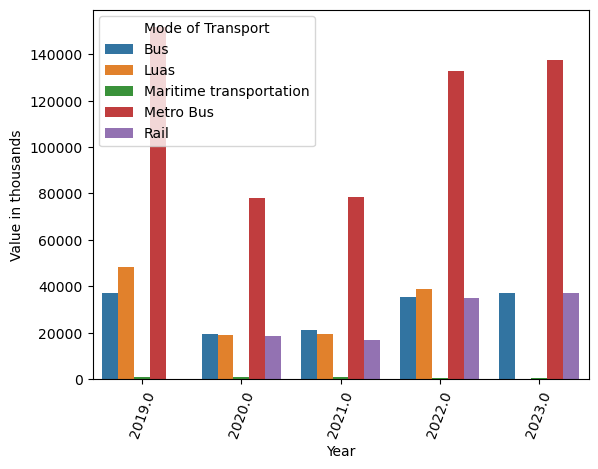

In [1791]:
ax = sns.barplot(x="Year", y="VALUE", hue='Mode of Transport', data=Ireland3)

plt.ylabel('Value in thousands')

plt.xticks(rotation=70)

In [1792]:
Ireland3= Ireland3[Ireland3['Mode of Transport'] == 'Maritime transportation']

# Data set for better integration with data from the 2 additional countries 

In [1793]:
Ireland['Country'] = 'Ireland'

In [1794]:
mapping = {
    'Luas': 'Tram and suburban railway',
    'Metro Bus':'Bus',
    'Rail': 'Tram and suburban railway',}

Ireland['Mode of Transport'] = Ireland['Mode of Transport'].replace(mapping)

In [1795]:
Ireland.head()

,Year,Mode of Transport,Quarter,VALUE,Country
0,2019,Tram and suburban railway,K1,11455,Ireland
1,2019,Tram and suburban railway,K2,11580,Ireland
2,2019,Tram and suburban railway,K3,12078,Ireland
3,2019,Tram and suburban railway,K4,13232,Ireland
4,2020,Tram and suburban railway,K1,9520,Ireland


# Second country: Norway 

In [1796]:
NRWW.head()

,Contents,Mode of Transport,Type of route,2019K1,2019K2,2019K3,2019K4,2020K1,2020K2,2020K3,...,2021K2,2021K3,2021K4,2022K1,2022K2,2022K3,2022K4,2023K1,2023K2,2023K3
0,Passengers (1 000 passengers),All modes of transportation,Total,185208,166243,154021,189817,147832,78412,104742,...,105964,119821,147908,143175,156600,149507,176612,187085,173702,162879
1,Passengers (1 000 passengers),All modes of transportation,Commercial routs,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
2,Passengers (1 000 passengers),All modes of transportation,Public-funded routes,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
3,Passengers (1 000 passengers),Bus (Scheduled road transport),Total,111127,97337,89841,115613,91551,49575,65728,...,71174,75073,93229,91748,96026,90117,109149,117465,106997,98617
4,Passengers (1 000 passengers),Bus (Scheduled road transport),Commercial routs,2161,2140,2314,2152,2084,352,1096,...,368,942,1076,962,1432,1730,1347,1090,1400,1457


In [1797]:
NRWW= NRWW[NRWW['Type of route'] == 'Public-funded routes']
NRWW.head()

,Contents,Mode of Transport,Type of route,2019K1,2019K2,2019K3,2019K4,2020K1,2020K2,2020K3,...,2021K2,2021K3,2021K4,2022K1,2022K2,2022K3,2022K4,2023K1,2023K2,2023K3
2,Passengers (1 000 passengers),All modes of transportation,Public-funded routes,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
5,Passengers (1 000 passengers),Bus (Scheduled road transport),Public-funded routes,108967,95197,87527,113461,89467,49224,64632,...,70805,74131,92153,90786,94594,88387,107801,116375,105597,97161
8,Passengers (1 000 passengers),Boat,Public-funded routes,1990,2528,2730,2124,1570,1235,1852,...,1447,2089,1518,1376,2182,2524,2106,1752,2430,2398
11,Passengers (1 000 passengers),Tram and suburban railway,Public-funded routes,50904,45116,42323,50136,36986,20261,27133,...,24163,31072,38044,36067,40642,39584,45952,48231,44102,42549
14,Passengers (1 000 passengers),Railway,Public-funded routes,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.


In [1798]:
NRWW.drop(['Contents', 'Type of route'], axis=1, inplace=True)

In [1799]:
NRWW_1=NRWW.drop([2, 14])

In [1800]:
NRWW_1.head()

,Mode of Transport,2019K1,2019K2,2019K3,2019K4,2020K1,2020K2,2020K3,2020K4,2021K1,2021K2,2021K3,2021K4,2022K1,2022K2,2022K3,2022K4,2023K1,2023K2,2023K3
5,Bus (Scheduled road transport),108967,95197,87527,113461,89467,49224,64632,71002,67629,70805,74131,92153,90786,94594,88387,107801,116375,105597,97161
8,Boat,1990,2528,2730,2124,1570,1235,1852,1183,974,1447,2089,1518,1376,2182,2524,2106,1752,2430,2398
11,Tram and suburban railway,50904,45116,42323,50136,36986,20261,27133,25401,21677,24163,31072,38044,36067,40642,39584,45952,48231,44102,42549


In [1801]:
mapping = {
    'Bus (Scheduled road transport)': 'Bus',
    'Boat':'Maritime transportation '}

NRWW_1['Mode of Transport'] = NRWW_1['Mode of Transport'].replace(mapping)

In [1802]:
NRWW_1.head()

,Mode of Transport,2019K1,2019K2,2019K3,2019K4,2020K1,2020K2,2020K3,2020K4,2021K1,2021K2,2021K3,2021K4,2022K1,2022K2,2022K3,2022K4,2023K1,2023K2,2023K3
5,Bus,108967,95197,87527,113461,89467,49224,64632,71002,67629,70805,74131,92153,90786,94594,88387,107801,116375,105597,97161
8,Maritime transportation,1990,2528,2730,2124,1570,1235,1852,1183,974,1447,2089,1518,1376,2182,2524,2106,1752,2430,2398
11,Tram and suburban railway,50904,45116,42323,50136,36986,20261,27133,25401,21677,24163,31072,38044,36067,40642,39584,45952,48231,44102,42549


In [1803]:
NRWW_3= NRWW_1.melt(var_name="Year",value_name="VALUE")
NRWW_3.head()

,Year,VALUE
0,Mode of Transport,Bus
1,Mode of Transport,Maritime transportation
2,Mode of Transport,Tram and suburban railway
3,2019K1,108967
4,2019K1,1990


In [1804]:
sequence = ['Bus', 'Maritime transportation', 'Tram and suburban railway']
seq_length = len(sequence)

NRWW_3['Mode of Transport'] = [sequence[i % seq_length] for i in range(len(NRWW_3))]

NRWW_3.head()

,Year,VALUE,Mode of Transport
0,Mode of Transport,Bus,Bus
1,Mode of Transport,Maritime transportation,Maritime transportation
2,Mode of Transport,Tram and suburban railway,Tram and suburban railway
3,2019K1,108967,Bus
4,2019K1,1990,Maritime transportation


In [1805]:
NRWW_3 = NRWW_3.drop([0, 1, 2])

In [1806]:
NRWW_3[['Year', 'Quarter']] = NRWW_3['Year'].str.extract(r'(\d{4})(K\d)')
NRWW_3.head()

,Year,VALUE,Mode of Transport,Quarter
3,2019,108967,Bus,K1
4,2019,1990,Maritime transportation,K1
5,2019,50904,Tram and suburban railway,K1
6,2019,95197,Bus,K2
7,2019,2528,Maritime transportation,K2


In [1807]:
NRWW_3['Country'] = 'Norway'

Concatenate the two data frames of the two countries, Ireland and Norway with data for the last 5 years per quarter. 

In [1808]:
Transport = pd.concat([Ireland, NRWW_3], ignore_index=True)
Transport

,Year,Mode of Transport,Quarter,VALUE,Country
0,2019,Tram and suburban railway,K1,11455,Ireland
1,2019,Tram and suburban railway,K2,11580,Ireland
2,2019,Tram and suburban railway,K3,12078,Ireland
3,2019,Tram and suburban railway,K4,13232,Ireland
4,2020,Tram and suburban railway,K1,9520,Ireland
...,...,...,...,...,...
128,2023,Maritime transportation,K2,2430,Norway
129,2023,Tram and suburban railway,K2,44102,Norway
130,2023,Bus,K3,97161,Norway
131,2023,Maritime transportation,K3,2398,Norway


# Evolution of transport use Ireland and Norway since 2019

In [1809]:
fig = px.bar(Transport, x='Year', y='VALUE', color='Mode of Transport',
             animation_frame='Quarter', facet_col='Country',
             title='Transport: Ireland & Norway')

fig.show()

# Data set per year 

In [1810]:
Transport_Year = Transport.groupby(['Year', 'Country', 'Mode of Transport'])['VALUE'].sum().reset_index()

In [1811]:
Transport_Year= pd.concat([Transport_Year, Ireland3], ignore_index=True)
Transport_Year.head()

,Year,Country,Mode of Transport,VALUE
0,2019,Ireland,Bus,188554
1,2019,Ireland,Tram and suburban railway,48345
2,2020,Ireland,Bus,97520
3,2020,Ireland,Tram and suburban railway,37954
4,2021,Ireland,Bus,99409


<Axes: xlabel='Year,Country'>

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Value in thousands ')

Text(0.5, 1.0, 'Transportation per Year: Ireland & Norway')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '(2019, Ireland)'),
  Text(1, 0, '(2020, Ireland)'),
  Text(2, 0, '(2021, Ireland)'),
  Text(3, 0, '(2022, Ireland)'),
  Text(4, 0, '(2023, Ireland)'),
  Text(5, 0, '(2019, Norway)'),
  Text(6, 0, '(2020, Norway)'),
  Text(7, 0, '(2021, Norway)'),
  Text(8, 0, '(2022, Norway)'),
  Text(9, 0, '(2023, Norway)')])

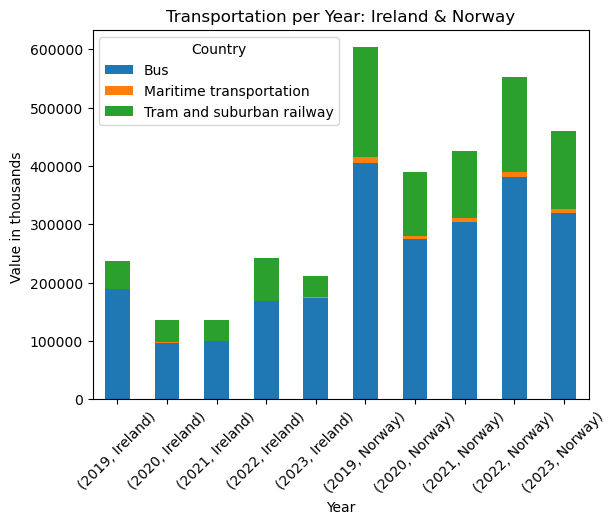

In [1812]:
grouped = Transport_Year.groupby(['Year', 'Country', 'Mode of Transport'])['VALUE'].sum().unstack().fillna(0)

grouped.plot(kind='bar', stacked=True)
plt.xlabel('Year')
plt.ylabel('Value in thousands ')
plt.title('Transportation per Year: Ireland & Norway')
plt.legend(title='Country')
plt.xticks(rotation=45)


plt.show()

# Third Country: New Zealand

In [1813]:
NZL

,Unnamed: 0,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Bus,70.2,77.4,89.1,88.1,87.2,89.3,90.3,93.0,99.1,101.0,100.9,103.7,104.1,108.4,112.3,112.2,113.9,118.3,126.0
1,Train,12.2,12.4,12.5,13.4,14.3,16.4,16.9,18.4,19.5,19.6,21.1,22.2,21.4,23.1,26.1,29.6,32.7,33.7,35.7
2,Ferry,3.5,3.8,4.0,4.0,4.1,4.2,4.2,4.7,4.7,4.9,5.0,5.7,5.8,5.5,5.9,6.2,6.5,6.4,6.7


In [1814]:
NZL_1= NZL.melt(var_name="Year",value_name="VALUE")
NZL_1.head()

,Year,VALUE
0,Unnamed: 0,Bus
1,Unnamed: 0,Train
2,Unnamed: 0,Ferry
3,2000,70.2
4,2000,12.2


In [1815]:
sequence = ['Bus', 'Tram and suburban railway', 'Maritime transportation']
seq_length = len(sequence)

NZL_1['Mode of Transport'] = [sequence[i % seq_length] for i in range(len(NZL_1))]

NZL_1.head()

,Year,VALUE,Mode of Transport
0,Unnamed: 0,Bus,Bus
1,Unnamed: 0,Train,Tram and suburban railway
2,Unnamed: 0,Ferry,Maritime transportation
3,2000,70.2,Bus
4,2000,12.2,Tram and suburban railway


In [1816]:
NZL_1 = NZL_1.drop([0, 1, 2])

In [1817]:
NZL_1['VALUE'] = pd.to_numeric(NZL_1['VALUE'], errors='coerce')

In [1818]:
NZL_1['VALUE'] = (NZL_1['VALUE'] * 1000).round(2)
NZL_1.head()

,Year,VALUE,Mode of Transport
3,2000,70200.0,Bus
4,2000,12200.0,Tram and suburban railway
5,2000,3500.0,Maritime transportation
6,2001,77400.0,Bus
7,2001,12400.0,Tram and suburban railway


In [1819]:
NZL_1['Year'] = NZL_1['Year'].astype(int)
NZL_1['VALUE'] = NZL_1['VALUE'].astype(float)

# Linear projection for each mode of transport

Due to the lack of current data, a 5-year projection will be made in order to have data up to 2023

In [1820]:
newzeland = pd.DataFrame(columns=['Year', 'Mode of Transport', 'VALUE'])

for mode in NZL_1['Mode of Transport'].unique():
    mode_data = NZL_1[NZL_1['Mode of Transport'] == mode]
    x = mode_data['Year'].values.reshape(-1, 1)
    y = mode_data['VALUE'].values.reshape(-1, 1)

#Linear projection for the next 5 years
    next_years = np.arange(NZL_1['Year'].max() + 1, NZL_1['Year'].max() + 6).reshape(-1, 1)
    coef = np.polyfit(x.ravel(), y.ravel(), 1)
    projection = np.polyval(coef, next_years)

#DataFrame
    newzeland = newzeland.append(pd.DataFrame({'Year': next_years.ravel(), 'Mode of Transport': [mode] * 5, 'VALUE': projection.ravel()}), ignore_index=True)

newzeland.head()

,Year,Mode of Transport,VALUE
0,2019,Bus,123992.982456
1,2020,Bus,126473.859649
2,2021,Bus,128954.736842
3,2022,Bus,131435.614035
4,2023,Bus,133916.491228


In [1821]:
newzeland['VALUE'] = newzeland['VALUE'].round(2)

In [1822]:
newzeland['Country'] = 'Newzeland'
newzeland.head()

,Year,Mode of Transport,VALUE,Country
0,2019,Bus,123992.98,Newzeland
1,2020,Bus,126473.86,Newzeland
2,2021,Bus,128954.74,Newzeland
3,2022,Bus,131435.61,Newzeland
4,2023,Bus,133916.49,Newzeland


In [1823]:
Transport_1 = pd.concat([Transport_Year, newzeland], ignore_index=True)
Transport_1.head()

,Year,Country,Mode of Transport,VALUE
0,2019,Ireland,Bus,188554
1,2019,Ireland,Tram and suburban railway,48345
2,2020,Ireland,Bus,97520
3,2020,Ireland,Tram and suburban railway,37954
4,2021,Ireland,Bus,99409


In [1824]:
Transport_1['Year'] = Transport_1['Year'].astype(int)
Transport_1['VALUE'] = Transport_1['VALUE'].astype(float)

# Evolution per year for each mode of transport: Ireland-Norway-New Zealand

In [1825]:
fig = px.line(Transport_1, x='Year', y='VALUE', color='Country', facet_col='Mode of Transport',
              title='Evolution per year for each mode of transport')

fig.update_yaxes(title_text='Value in thousands ')

# First analysis

According to the population from 2019 to 2023, it is estimated how many times per person have used each of the transports 

In [1826]:
Population = pd.concat([PI,PN, PNZ], ignore_index=True)
Population.head()

,Year,Population,Country
0,2019,4958.5,Ireland
1,2020,5029.9,Ireland
2,2021,5074.7,Ireland
3,2022,5184.0,Ireland
4,2023,5281.6,Ireland


In [1827]:
merged_Population = pd.merge(Transport_1, Population, on=['Year', 'Country'])
merged_Population.head()

,Year,Country,Mode of Transport,VALUE,Population
0,2019,Ireland,Bus,188554.000,4958.5
1,2019,Ireland,Tram and suburban railway,48345.000,4958.5
2,2019,Ireland,Maritime transportation,864.886,4958.5
3,2020,Ireland,Bus,97520.000,5029.9
4,2020,Ireland,Tram and suburban railway,37954.000,5029.9


In [1828]:
# Statistical information 

In [1829]:
P_stats = merged_Population.groupby('Country')['Population'].agg(['mean', 'var', 'median', 'std', 'min', 'max'])
P_stats= pd.DataFrame(P_stats)
P_stats

,mean,var,median,std,min,max
Country,,,,,,
Ireland,5105.740,14024.179714,5074.700,118.423730,4958.500,5281.600
Newzeland,5137.780,6176.337429,5116.500,78.589678,5040.400,5269.200
Norway,5400.283,3179.012618,5391.369,56.382733,5328.212,5488.984


In [1830]:
# Annual growth rate
P_stats['growth_rate'] = P_stats['mean'].pct_change() * 100

In [1831]:
population_mean = P_stats['mean']
population_mean

Country
Ireland      5105.740
Newzeland    5137.780
Norway       5400.283
Name: mean, dtype: float64

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Mean Population')

Text(0.5, 1.0, 'Mean Population over Years')

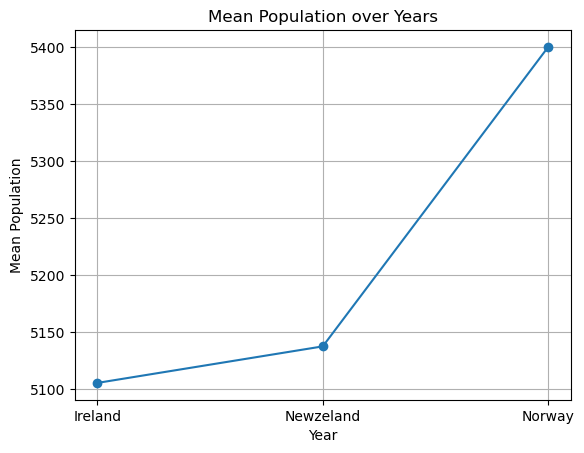

In [1832]:
plt.plot(population_mean.index, population_mean.values, marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Mean Population')
plt.title('Mean Population over Years')

plt.grid(True)
plt.show()

In [1833]:
population_var = P_stats['var']
population_var

Country
Ireland      14024.179714
Newzeland     6176.337429
Norway        3179.012618
Name: var, dtype: float64

<BarContainer object of 3 artists>

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Var Population')

Text(0.5, 1.0, 'Var Population over Years')

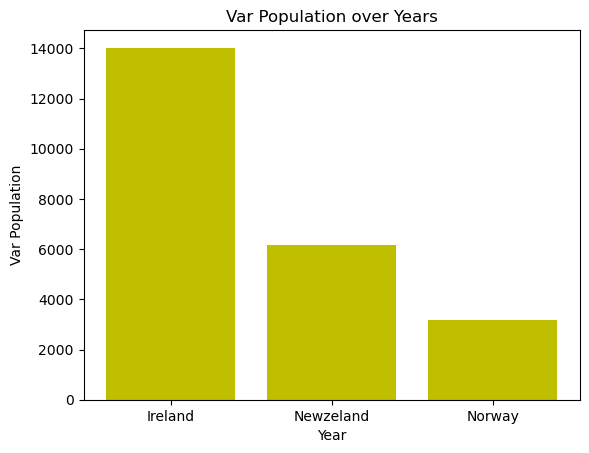

In [1834]:
Country = ['Ireland', 'Newzeland', 'Norway']
VALUE = [14024.17, 6176.33, 3179.01]

plt.bar(Country, VALUE, color='y')

plt.xlabel('Year')
plt.ylabel('Var Population')
plt.title('Var Population over Years')

# Mostrar la gráfica
plt.show()

In [1835]:
population_growth_rate = P_stats['growth_rate']
population_growth_rate

Country
Ireland           NaN
Newzeland    0.627529
Norway       5.109269
Name: growth_rate, dtype: float64

In [1836]:
population_growth_rate = pd.DataFrame(population_growth_rate)

In [1837]:
P_stats

,mean,var,median,std,min,max,growth_rate
Country,,,,,,,
Ireland,5105.740,14024.179714,5074.700,118.423730,4958.500,5281.600,NaN
Newzeland,5137.780,6176.337429,5116.500,78.589678,5040.400,5269.200,0.627529
Norway,5400.283,3179.012618,5391.369,56.382733,5328.212,5488.984,5.109269


In the case of Ireland I get the first NA value because it does not have a previous year to compare it with

In [1838]:
ireland_data = merged_Population[merged_Population['Country'] == 'Ireland']

ireland_first_year = ireland_data[ireland_data['Year'] > ireland_data['Year'].min()]

initial_population = ireland_data[ireland_data['Year'] == ireland_data['Year'].min()]['Population'].iloc[0]
final_population = ireland_first_year['Population'].iloc[-1]
growth_rate_general = ((final_population - initial_population) / initial_population) * 100

print("Ireland Growth rate:", growth_rate_general)

Ireland Growth rate: 6.516083492991839


In [1839]:
P_stats.loc['Ireland', 'growth_rate'] = 6.516083
P_stats

,mean,var,median,std,min,max,growth_rate
Country,,,,,,,
Ireland,5105.740,14024.179714,5074.700,118.423730,4958.500,5281.600,6.516083
Newzeland,5137.780,6176.337429,5116.500,78.589678,5040.400,5269.200,0.627529
Norway,5400.283,3179.012618,5391.369,56.382733,5328.212,5488.984,5.109269


<Axes: xlabel='Country'>

Text(0.5, 1.0, 'Growth rate')

Text(0.5, 0, 'Country')

Text(0, 0.5, 'Growth rate')

(array([0, 1, 2]),
 [Text(0, 0, 'Ireland'), Text(1, 0, 'Newzeland'), Text(2, 0, 'Norway')])

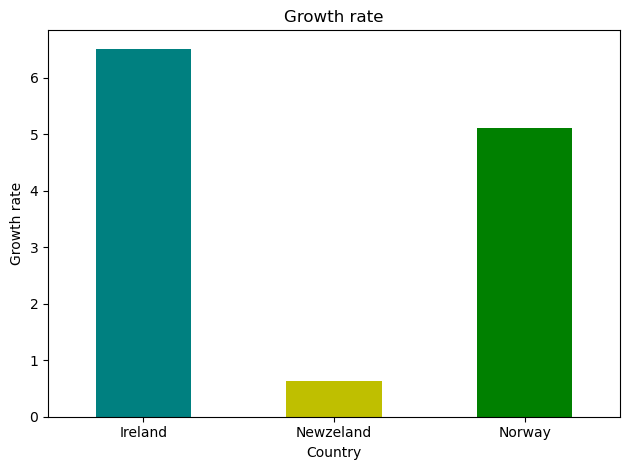

In [1840]:
P_stats['growth_rate'].plot(kind='bar', color=['teal', 'y', 'green'])
plt.title('Growth rate')
plt.xlabel('Country')
plt.ylabel('Growth rate')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# Frequency of Use

In [1841]:
merged_Population['Frequency_of_Use'] = merged_Population['VALUE'] / merged_Population['Population'] 
merged_Population.head()

,Year,Country,Mode of Transport,VALUE,Population,Frequency_of_Use
0,2019,Ireland,Bus,188554.000,4958.5,38.026419
1,2019,Ireland,Tram and suburban railway,48345.000,4958.5,9.749924
2,2019,Ireland,Maritime transportation,864.886,4958.5,0.174425
3,2020,Ireland,Bus,97520.000,5029.9,19.388059
4,2020,Ireland,Tram and suburban railway,37954.000,5029.9,7.545677


In [1842]:
MP= merged_Population

In [1843]:
#Future population using the statistical data 

In [1844]:
growth_rates = P_stats['growth_rate']


future_years = range(2024, 2029)

future_population = pd.DataFrame(columns=['Year', 'Country', 'Population'])

for country in merged_Population['Country'].unique():
    population = merged_Population[merged_Population['Country'] == country]['Population'].iloc[-1]
    growth_rate = growth_rates.loc[country]
    
    population_predictions = []
    for year in years_to_predict:
        population = population * (1 + (growth_rate / 100))**(year - merged_Population['Year'].max())
        population_predictions.append([year, country, population])
    
    df_predictions = pd.DataFrame(population_predictions, columns=['Year', 'Country', 'Population'])
    future_population = pd.concat([future_population, df_predictions])

future_population.head()

,Year,Country,Population
0,2024,Ireland,5625.753440
1,2025,Ireland,6382.797543
2,2026,Ireland,7713.591426
3,2027,Ireland,9929.271388
4,2028,Ireland,13614.237359


In [1845]:
merged_population_future = pd.merge(merged_Population, future_population, on=['Year', 'Country'], how='outer')

# Cross-Validation with Linear Regression

In [1846]:
# number of observations 
len(merged_Population.index)

45

In [1847]:
# filter only Population and Frequency of use
CVLR = merged_Population.loc[:, ['Population', 'Frequency_of_Use']]
CVLR.head()

,Population,Frequency_of_Use
0,4958.5,38.026419
1,4958.5,9.749924
2,4958.5,0.174425
3,5029.9,19.388059
4,5029.9,7.545677


In [1848]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [1849]:
# recaling the variables (both)
CVLR_columns = CVLR.columns
scaler = MinMaxScaler()
CVLR = scaler.fit_transform(CVLR)

# rename columns (since now its an np array)
CVLR = pd.DataFrame(CVLR)
CVLR.columns = CVLR_columns

CVLR.head()

,Population,Frequency_of_Use
0,0.000000,0.499467
1,0.000000,0.127135
2,0.000000,0.001050
3,0.134594,0.254046
4,0.134594,0.098111


<Axes: xlabel='Population', ylabel='Frequency_of_Use'>

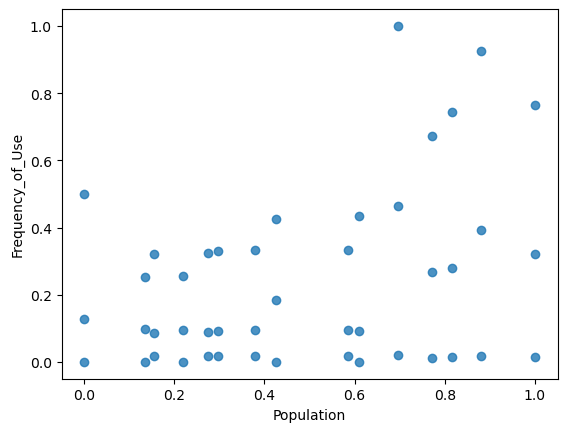

In [1850]:
# visualise Population&Frequency_of_Use relationship
sns.regplot(x="Population", y="Frequency_of_Use", data=CVLR, fit_reg=False)

Text(0.5, 1.0, 'Relationship between Population and Frequency_of_Use by Country')

Text(0.5, 0, 'Population')

Text(0, 0.5, 'Frequency_of_Use')

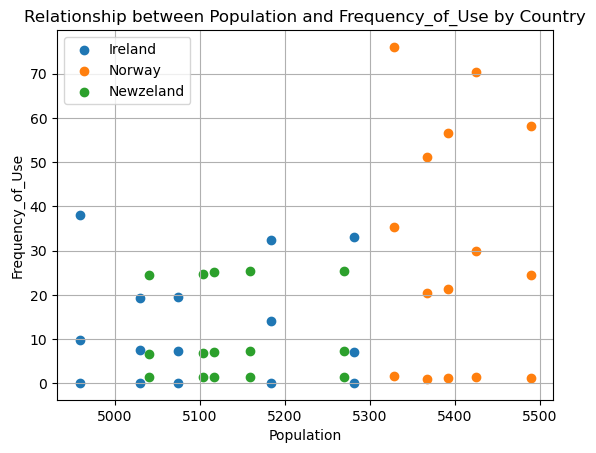

In [1851]:
countries = merged_Population['Country'].unique()

for country in countries:
    country_data = merged_Population[merged_Population['Country'] == country]
    plt.scatter(country_data['Population'], country_data['Frequency_of_Use'], label=country)

plt.title('Relationship between Population and Frequency_of_Use by Country')
plt.xlabel('Population')
plt.ylabel('Frequency_of_Use')
plt.legend()
plt.grid(True)
plt.show()

# Logistic Regression

# Model Building

Splitting data into a training set and a test set.

In [1852]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

# Dummy Variable Creation

In [1853]:
# Creating a dummy variable for the variable 'Country' and dropping the first one.
con = pd.get_dummies(merged_Population['Country'],prefix='Country',drop_first=True)

#Adding the results to the master dataframe
merged_Population = pd.concat([merged_Population,con],axis=1)

# Creating a dummy variable for the variable 'Mode of Transport' and dropping the first one.
moft = pd.get_dummies(merged_Population['Mode of Transport'],prefix='Mode of Transport',drop_first=True)

#Adding the results to the master dataframe
merged_Population = pd.concat([merged_Population,moft],axis=1)

In [1854]:
merged_Population.head()

,Year,Country,Mode of Transport,VALUE,Population,Frequency_of_Use,Country_Newzeland,Country_Norway,Mode of Transport_Maritime transportation,Mode of Transport_Tram and suburban railway
0,2019,Ireland,Bus,188554.000,4958.5,38.026419,0,0,0,0
1,2019,Ireland,Tram and suburban railway,48345.000,4958.5,9.749924,0,0,0,1
2,2019,Ireland,Maritime transportation,864.886,4958.5,0.174425,0,0,1,0
3,2020,Ireland,Bus,97520.000,5029.9,19.388059,0,0,0,0
4,2020,Ireland,Tram and suburban railway,37954.000,5029.9,7.545677,0,0,0,1


# Checking outliers at 25%,50%,75%,90%,95% and 99%

In [1855]:
merged_Population.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Year,VALUE,Population,Frequency_of_Use,Country_Newzeland,Country_Norway,Mode of Transport_Maritime transportation,Mode of Transport_Tram and suburban railway
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,2021.000000,94645.863378,5214.601000,17.937538,0.333333,0.333333,0.333333,0.333333
std,1.430194,106363.922479,158.885554,19.817248,0.476731,0.476731,0.476731,0.476731
min,2019.000000,500.232000,4958.500000,0.094712,0.000000,0.000000,0.000000,0.000000
25%,2020.000000,7359.300000,5074.700000,1.426470,0.000000,0.000000,0.000000,0.000000
50%,2021.000000,39021.050000,5184.000000,7.545677,0.000000,0.000000,0.000000,0.000000
75%,2022.000000,133916.490000,5367.580000,25.414957,1.000000,1.000000,1.000000,1.000000
90%,2023.000000,240016.600000,5425.270000,45.875225,1.000000,1.000000,1.000000,1.000000
95%,2023.000000,316250.000000,5476.241200,57.816425,1.000000,1.000000,1.000000,1.000000
99%,2023.000000,394775.040000,5488.984000,73.527760,1.000000,1.000000,1.000000,1.000000


In [1856]:
# Checking the percentage of missing values
round(100*(merged_Population.isnull().sum()/len(merged_Population.index)), 2)

Year                                           0.0
Country                                        0.0
Mode of Transport                              0.0
VALUE                                          0.0
Population                                     0.0
Frequency_of_Use                               0.0
Country_Newzeland                              0.0
Country_Norway                                 0.0
Mode of Transport_Maritime transportation      0.0
Mode of Transport_Tram and suburban railway    0.0
dtype: float64

# Feature Standardisation

Checking for Outliers

In [1857]:
merged_Population.dtypes

Year                                             int32
Country                                         object
Mode of Transport                               object
VALUE                                          float64
Population                                     float64
Frequency_of_Use                               float64
Country_Newzeland                                uint8
Country_Norway                                   uint8
Mode of Transport_Maritime transportation        uint8
Mode of Transport_Tram and suburban railway      uint8
dtype: object

Normalising continuous features

In [1858]:
FS= merged_Population[['Frequency_of_Use','Population','VALUE']]

In [1859]:
normalized_FS=(FS-FS.mean())/FS.std()

In [1860]:
merged_Population = merged_Population.drop(['Frequency_of_Use','Population','VALUE'], 1)

In [1861]:
merged_Population = pd.concat([merged_Population,normalized_FS],axis=1)

In [1862]:
merged_Population .head()

,Year,Country,Mode of Transport,Country_Newzeland,Country_Norway,Mode of Transport_Maritime transportation,Mode of Transport_Tram and suburban railway,Frequency_of_Use,Population,VALUE
0,2019,Ireland,Bus,0,0,0,0,1.013707,-1.611858,0.882895
1,2019,Ireland,Tram and suburban railway,0,0,0,1,-0.413156,-1.611858,-0.435306
2,2019,Ireland,Maritime transportation,0,0,1,0,-0.896346,-1.611858,-0.881699
3,2020,Ireland,Bus,0,0,0,0,0.073195,-1.162478,0.027022
4,2020,Ireland,Tram and suburban railway,0,0,0,1,-0.524385,-1.162478,-0.532999


# Splitting Data into Training and Test Sets

In [1863]:
# Putting feature variable to X
X = merged_Population .drop(['VALUE','Country','Mode of Transport'],axis=1)

# Putting response variable to y
y = merged_Population ['VALUE']

In [1864]:
X.shape, y.shape

((45, 7), (45,))

In [1865]:
y.head()

0    0.882895
1   -0.435306
2   -0.881699
3    0.027022
4   -0.532999
Name: VALUE, dtype: float64

In [1866]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [1867]:
X_train.shape

(31, 7)

# Running the First 

In [1868]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [1869]:
import statsmodels.api as sm

In [1870]:
X_train

,Year,Country_Newzeland,Country_Norway,Mode of Transport_Maritime transportation,Mode of Transport_Tram and suburban railway,Frequency_of_Use,Population
20,2020,0,1,0,1,0.126913,0.962825
7,2021,0,0,0,1,-0.541697,-0.880514
42,2023,1,0,0,0,0.377319,0.343637
18,2020,0,1,0,0,1.673806,0.962825
21,2021,0,1,0,0,1.946893,1.112549
13,2023,0,0,0,1,-0.551473,0.421681
1,2019,0,0,0,1,-0.413156,-1.611858
37,2021,1,0,0,1,-0.545533,-0.617432
12,2023,0,0,0,0,0.761905,0.421681
35,2020,1,0,1,0,-0.835910,-0.697993


In [1871]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 20 to 8
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Year                                         31 non-null     int32  
 1   Country_Newzeland                            31 non-null     uint8  
 2   Country_Norway                               31 non-null     uint8  
 3   Mode of Transport_Maritime transportation    31 non-null     uint8  
 4   Mode of Transport_Tram and suburban railway  31 non-null     uint8  
 5   Frequency_of_Use                             31 non-null     float64
 6   Population                                   31 non-null     float64
dtypes: float64(2), int32(1), uint8(4)
memory usage: 992.0 bytes


In [1872]:
import statsmodels.api as sm

# Agregar la constante para el término de intercepción
X_train = sm.add_constant(X_train)

# Crear y ajustar el modelo de regresión logística
logm1 = sm.GLM(y_train, X_train, family=sm.families.Binomial())
logm1_result = logm1.fit()

# Obtener el resumen del modelo
print(logm1_result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  VALUE   No. Observations:                   31
Model:                            GLM   Df Residuals:                       23
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 07 Jan 2024   Deviance:                       1486.1
Time:                        16:08:35   Pearson chi2:                 7.77e+16
No. Iterations:                     4   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [1873]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  VALUE   No. Observations:                   31
Model:                            GLM   Df Residuals:                       23
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 07 Jan 2024   Deviance:                       1486.1
Time:                        16:08:35   Pearson chi2:                 7.77e+16
No. Iterations:                     4   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                       -7.287e+16   5.13e+10  -1.42e+06      0.000   -7.29e+16   -7.29e+16
Year                                         3.445e+13   2.54e+07   1.36e+06      0.000    3.44e+13    3.44e+13
Country_Newzeland                            2.368e+14   3.18e+07   7.46e+06      0.000    2.37e+14    2.37e+14
Country_Norway                               3.709e+15   1.19e+08   3.11e+07      0.000    3.71e+15    3.71e+15
Mode of Transport_Maritime transportation   -6.979e+15    6.5e+07  -1.07e+08      0.000   -6.98e+15   -6.98e+15
Mode of Transport_Tram and suburban railway -1.954e+15    4.8e+07  -4.07e+07      0.000   -1.95e+15   -1.95e+15
Frequency_of_Use                             6.428e+15   2.91e+07   2.21e+08      0.000    6.43e+15    6.43e+15
Population                                  -7.798e+14   6.25e+07  -1.25e+07      0.000    -7.8e+14    -7.8e+14
===============================================================================================================
"""

# Correlation Matrix

In [1874]:
import seaborn as sns
%matplotlib inline

<Figure size 2000x1000 with 0 Axes>

<Axes: >

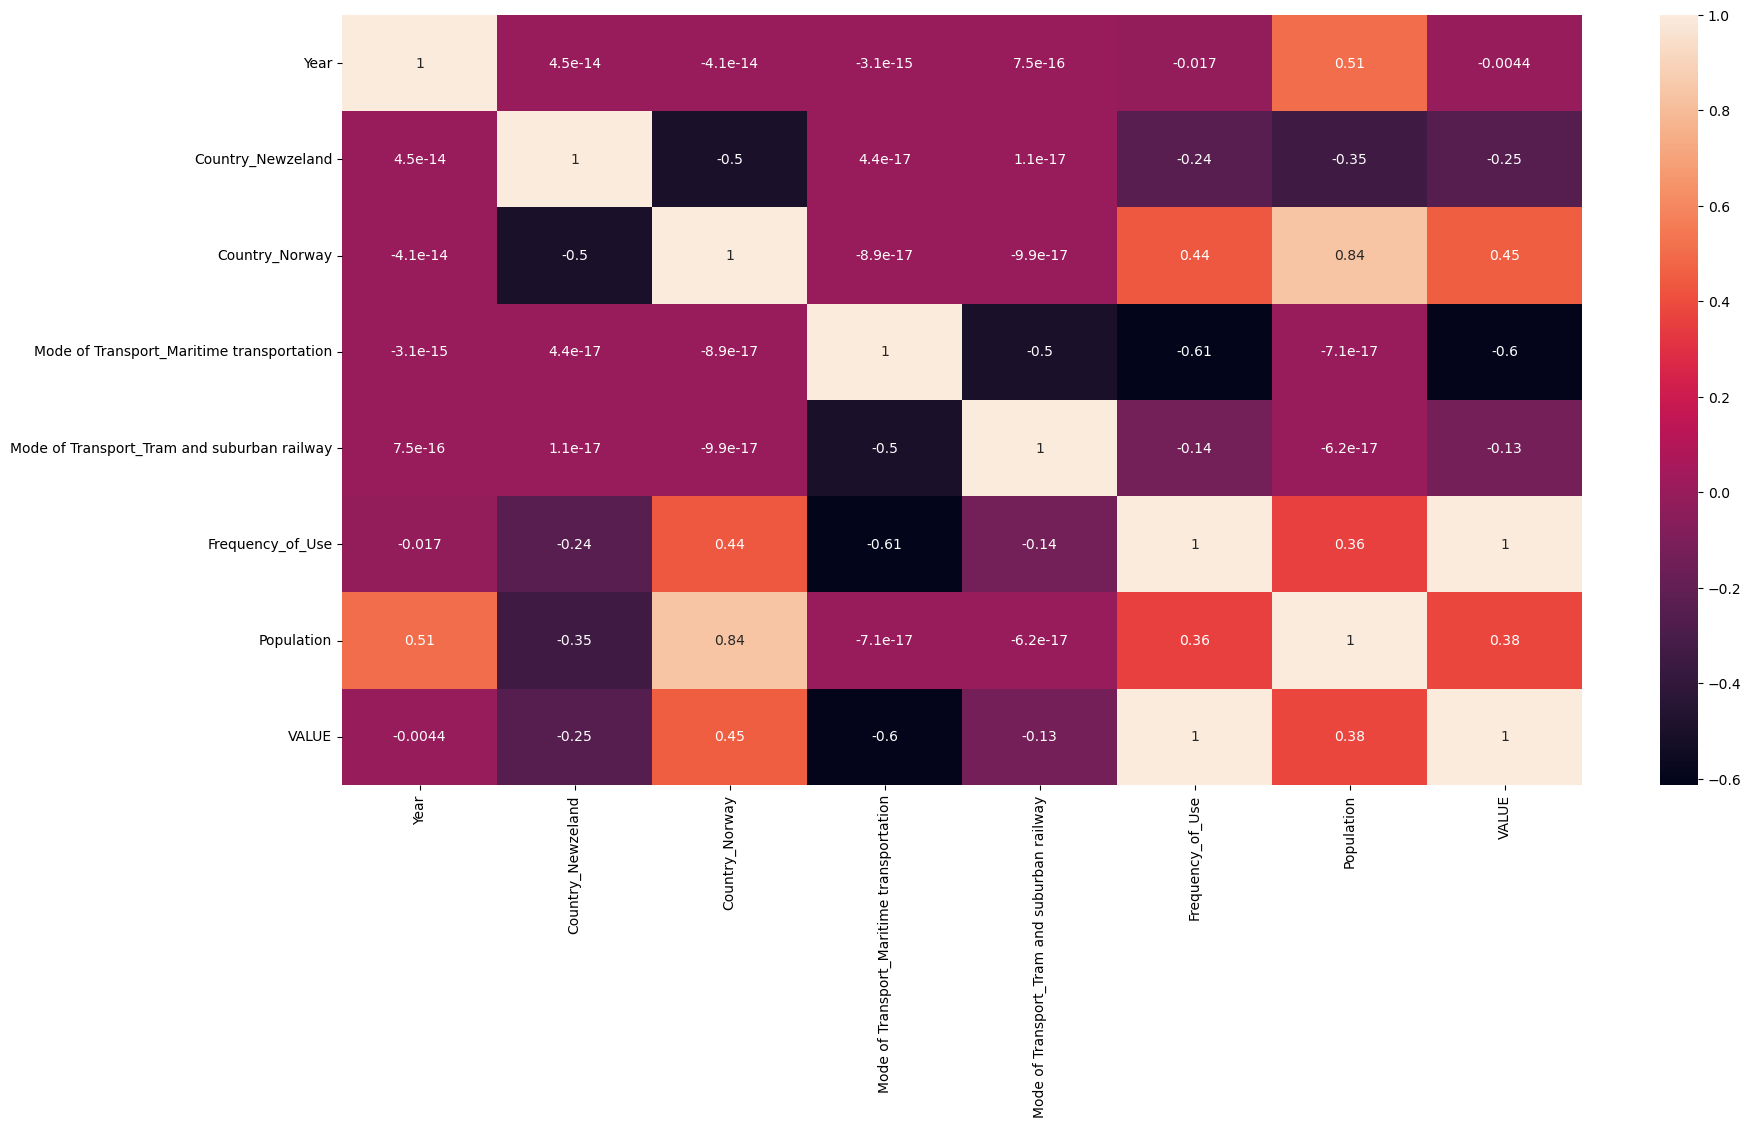

In [1875]:
plt.figure(figsize = (20,10))        
sns.heatmap(merged_Population.corr(),annot = True)

The LogisticRegression model is not successful because it is used for classification problems and in this objective it is desired to predict, so another model will be used. 

# RandomForestRegressor

In [1876]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [1877]:
# Putting feature variable to X
X = merged_Population .drop(['VALUE','Country','Mode of Transport'],axis=1)

# Putting response variable to y
y = merged_Population ['VALUE']

In [1878]:
print(X.shape)
print(y.shape) 

(45, 7)
(45,)


In [1879]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

In [1880]:
model=RandomForestRegressor()
model.fit(X, y)

RandomForestRegressor()

In [1881]:
# Making predictions on the test set
y_pred = model.predict(X_test)

y_pred

array([-0.81772043,  0.83071319,  0.03962458, -0.53116707, -0.47330905,
       -0.83279105, -0.88047745, -0.82325358, -0.52693862,  0.85453915,
        2.53463205,  0.3397068 ,  1.82826171, -0.83219009, -0.8285985 ,
        0.11018007, -0.82534228,  0.31575946])

In [1882]:
# Evaluating the model performance (for example, using Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0028979690204844985


Text(0.5, 0, 'Actual Values')

Text(0, 0.5, 'Predicted Values')

Text(0.5, 1.0, 'Comparison between Actual and Predicted Values')

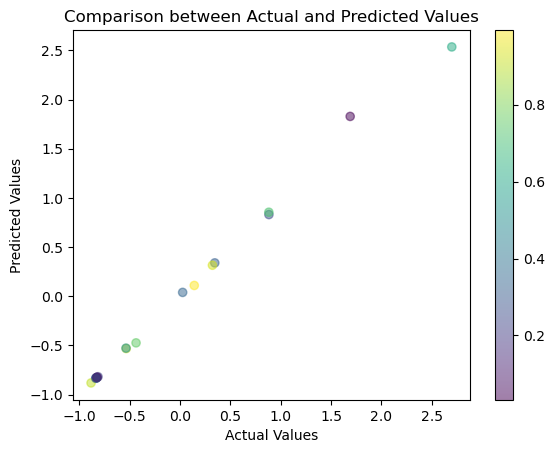

In [1883]:
color_variable = np.random.rand(len(y_test))

plt.scatter(y_test, y_pred, c=color_variable, cmap='viridis', alpha=0.5)
plt.colorbar()  # Add a color bar
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison between Actual and Predicted Values')
plt.show()

Text(0.5, 0, 'Actual Values')

Text(0, 0.5, 'Residuals (Actual - Predicted)')

Text(0.5, 1.0, 'Residuals vs. Actual Values')

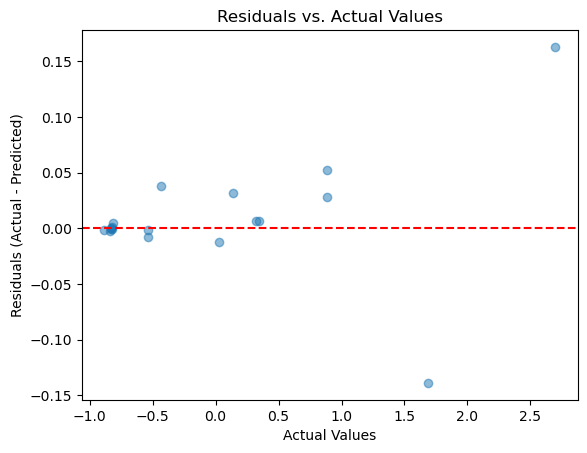

In [1884]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals vs. Actual Values')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0 for reference
plt.show()

# Making predictions

In [1885]:
RFpredictions = pd.DataFrame(columns=['Year', 'Country', 'Mode of Transport', 'Predicted_VALUE', 'Predicted_Population'])

unique_countries = MP['Country'].unique()
unique_transport_modes = MP['Mode of Transport'].unique()

In [1886]:
for country in unique_countries:
    for transport_mode in unique_transport_modes:
        subset = MP[(MP['Country'] == country) & (MP['Mode of Transport'] == transport_mode)]
        if not subset.empty:
            X = subset[['Year']]
            y_value = subset['VALUE']
            y_population = subset['Population']
            y_frequency = subset['Frequency_of_Use']
            
            model_value = RandomForestRegressor()
            model_value.fit(X, y_value)
            future_years = pd.DataFrame({'Year': range(2024, 2029)})  # Next 5 years
            future_predictions_value = model_value.predict(future_years)
            
            model_population = RandomForestRegressor()
            model_population.fit(X, y_population)
            future_predictions_population = model_population.predict(future_years)
            
            model_frequency = RandomForestRegressor()
            model_frequency.fit(X, y_frequency)
            future_predictions_frequency = model_frequency.predict(future_years)

            RFpredictions = pd.concat([RFpredictions, pd.DataFrame({
                'Year': future_years['Year'],
                'Country': country,
                'Mode of Transport': transport_mode,
                'Predicted_VALUE': future_predictions_value,
                'Predicted_Population': future_predictions_population,
                'Predicted_Frequency_of_Use': future_predictions_frequency
            })])

RandomForestRegressor()

RandomForestRegressor()

RandomForestRegressor()

RandomForestRegressor()

RandomForestRegressor()

RandomForestRegressor()

RandomForestRegressor()

RandomForestRegressor()

RandomForestRegressor()

RandomForestRegressor()

RandomForestRegressor()

RandomForestRegressor()

RandomForestRegressor()

RandomForestRegressor()

RandomForestRegressor()

RandomForestRegressor()

RandomForestRegressor()

RandomForestRegressor()

RandomForestRegressor()

RandomForestRegressor()

RandomForestRegressor()

RandomForestRegressor()

RandomForestRegressor()

RandomForestRegressor()

RandomForestRegressor()

RandomForestRegressor()

RandomForestRegressor()

In [1887]:
RFpredictions.head()

,Year,Country,Mode of Transport,Predicted_VALUE,Predicted_Population,Predicted_Frequency_of_Use
0,2024,Ireland,Bus,164269.0,5238.365,31.845035
1,2025,Ireland,Bus,164269.0,5238.365,31.845035
2,2026,Ireland,Bus,164269.0,5238.365,31.845035
3,2027,Ireland,Bus,164269.0,5238.365,31.845035
4,2028,Ireland,Bus,164269.0,5238.365,31.845035


# Linear Regression

In [1888]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

In [1889]:
# Putting feature variable to X
X = merged_Population .drop(['VALUE','Country','Mode of Transport'],axis=1)

# Putting response variable to y
y = merged_Population ['VALUE']

In [1890]:
print(X.shape)
print(y.shape) 

(45, 7)
(45,)


In [1891]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

In [1892]:
model=LinearRegression()
model.fit(X, y)

LinearRegression()

In [1893]:
# Making predictions on the test set
y_pred = model.predict(X_test)

y_pred

array([ 2.05946549, -0.54573547, -0.54460385, -0.80137563, -0.54914238,
       -0.90999285, -0.8102276 , -0.43988076, -0.18574198,  1.66920815,
        0.19451616,  0.90062376,  0.70320256, -0.55313859,  0.35431704,
        0.29985845,  1.95761671, -0.80918472])

In [1894]:
# Evaluating the model performance (for example, using Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.0003122697229962171


Text(0.5, 0, 'Actual Values')

Text(0, 0.5, 'Predicted Values')

Text(0.5, 1.0, 'Comparison between Actual and Predicted Values')

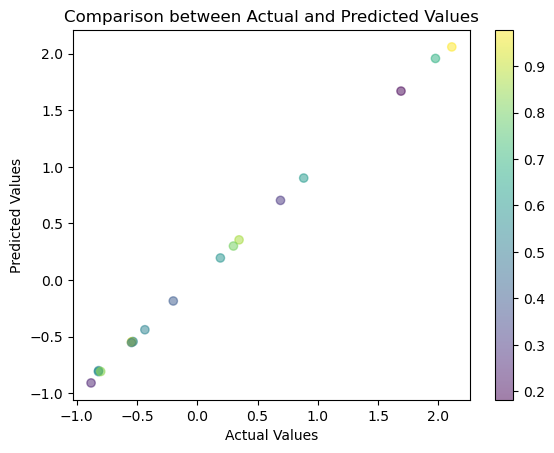

In [1895]:
color_variable = np.random.rand(len(y_test))

plt.scatter(y_test, y_pred, c=color_variable, cmap='viridis', alpha=0.5)
plt.colorbar()  # Add a color bar
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison between Actual and Predicted Values')
plt.show()

Text(0.5, 0, 'Actual Values')

Text(0, 0.5, 'Residuals (Actual - Predicted)')

Text(0.5, 1.0, 'Residuals vs. Actual Values')

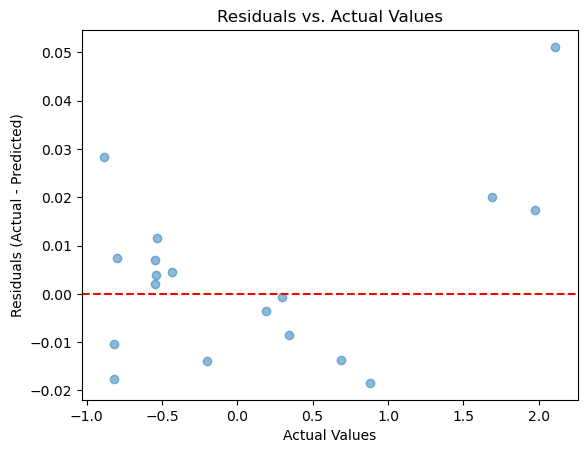

In [1896]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals vs. Actual Values')
plt.axhline(y=0, color='red', linestyle='--')  # Horizontal line at y=0 for reference
plt.show()

# Making predictions

In [1897]:
LRpredictions = pd.DataFrame(columns=['Year', 'Country', 'Mode of Transport', 'Predicted_VALUE', 'Predicted_Population'])

In [1898]:
# Get unique countries and transport modes
unique_countries = MP['Country'].unique()
unique_transport_modes = MP['Mode of Transport'].unique()

In [1899]:
for country in unique_countries:
    for transport_mode in unique_transport_modes:
        subset = MP[(MP['Country'] == country) & (MP['Mode of Transport'] == transport_mode)]
        if not subset.empty:
            X = subset[['Year']]
            y_value = subset['VALUE']
            y_population = subset['Population']
            y_frequency = subset['Frequency_of_Use']
            
            model_value = LinearRegression()
            model_value.fit(X, y_value)
            future_years = pd.DataFrame({'Year': range(2024, 2029)})  # Next 5 years
            future_predictions_value = model_value.predict(future_years)
            
            model_population = LinearRegression()
            model_population.fit(X, y_population)
            future_predictions_population = model_population.predict(future_years)
            
            model_frequency = LinearRegression()
            model_frequency.fit(X, y_frequency)
            future_predictions_frequency = model_frequency.predict(future_years)
            
            LRpredictions = pd.concat([LRpredictions, pd.DataFrame({
                'Year': future_years['Year'],
                'Country': country,
                'Mode of Transport': transport_mode,
                'Predicted_VALUE': future_predictions_value,
                'Predicted_Population': future_predictions_population,
                'Predicted_Frequency_of_Use': future_predictions_frequency
            })])

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

In [1900]:
LRpredictions.head()

,Year,Country,Mode of Transport,Predicted_VALUE,Predicted_Population,Predicted_Frequency_of_Use
0,2024,Ireland,Bus,158291.2,5345.83,29.400306
1,2025,Ireland,Bus,162524.4,5425.86,29.704042
2,2026,Ireland,Bus,166757.6,5505.89,30.007778
3,2027,Ireland,Bus,170990.8,5585.92,30.311514
4,2028,Ireland,Bus,175224.0,5665.95,30.615250


# SVM

In [1901]:
from sklearn.svm import SVC, SVR

In [1902]:
# Putting feature variable to X
X = merged_Population .drop(['VALUE','Country','Mode of Transport'],axis=1)

# Putting response variable to y
y = merged_Population ['VALUE']

In [1903]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

In [1904]:
#Training SVR model
model = SVR()
model.fit(X_train, y_train)
print(model)

SVR()

SVR()


In [1905]:
#Predict the target value for test data
expected_y  = y_test
predicted_y = model.predict(X_test)

In [1906]:
r2 = metrics.r2_score(expected_y, predicted_y)
mse = metrics.mean_squared_error(expected_y, predicted_y)

print(f'R² Score: {r2}')
print(f'Mean Squared Error (MSE): {mse}')

R² Score: -0.0024388993764528077
Mean Squared Error (MSE): 0.5043856379715723


<Figure size 1000x1000 with 0 Axes>

<Axes: xlabel='VALUE'>

Text(0.5, 0, 'Expected Values')

Text(0, 0.5, 'Predicted Values')

Text(0.5, 1.0, 'Expected vs Predicted Values')

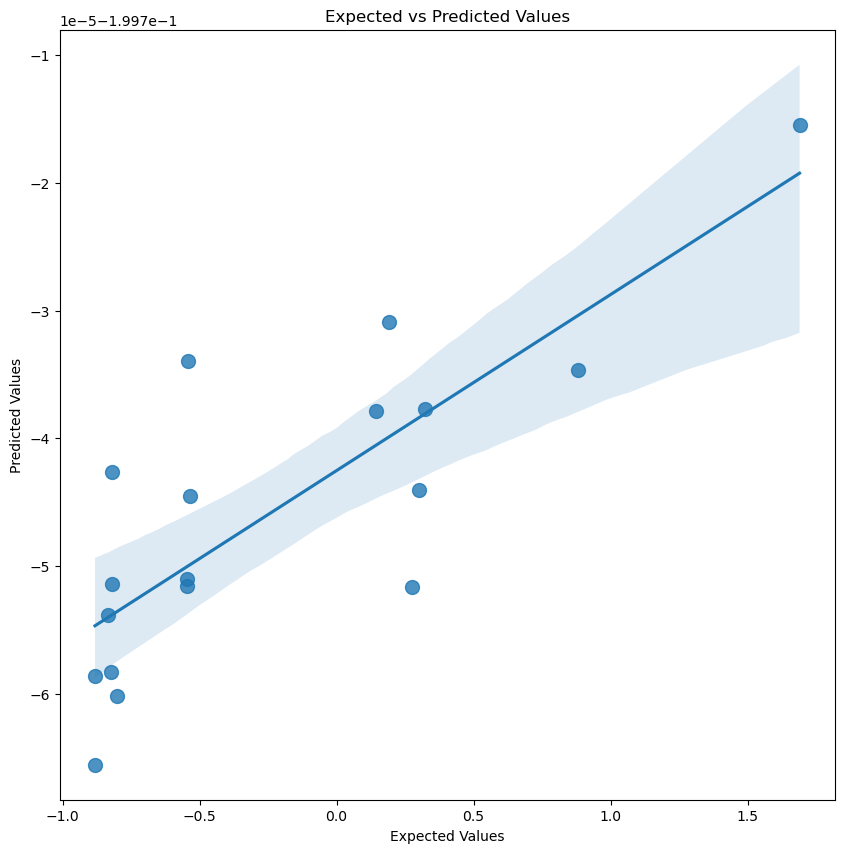

In [1907]:
plt.figure(figsize=(10, 10))
sns.regplot(x=expected_y, y=predicted_y, scatter_kws={"s": 100})
plt.xlabel('Expected Values')
plt.ylabel('Predicted Values')
plt.title('Expected vs Predicted Values')
plt.show()

# Final dataframe

In [1908]:
RFpredictions.rename(columns={'Predicted_VALUE': 'VALUE', 'Predicted_Population': 'Population', 'Predicted_Frequency_of_Use':'Frequency_of_Use'}, inplace=True)

In [1911]:
MP = pd.concat([MP,RFpredictions])

## Interactive visualization of geographic data for frequency of use

In [1912]:
# Country codes
def Code(row):
    if row['Country'] == 'Ireland':
        return 'IRL'
    if row['Country'] == 'Norway':
        return 'NOR'
    if row['Country'] == 'Newzeland':
        return 'NZL'

MP['Code'] = MP.apply(Code, axis=1)
MP.head()

,Year,Country,Mode of Transport,VALUE,Population,Frequency_of_Use,Code
0,2019,Ireland,Bus,188554.000,4958.5,38.026419,IRL
1,2019,Ireland,Tram and suburban railway,48345.000,4958.5,9.749924,IRL
2,2019,Ireland,Maritime transportation,864.886,4958.5,0.174425,IRL
3,2020,Ireland,Bus,97520.000,5029.9,19.388059,IRL
4,2020,Ireland,Tram and suburban railway,37954.000,5029.9,7.545677,IRL


# Bus

In [1913]:
bus= MP[MP['Mode of Transport'] == 'Bus']

In [1914]:
fig = px.choropleth(bus, 
                    locations="Code",
                    color="Frequency_of_Use",
                    hover_name="Country",
                    animation_frame="Year",
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(
    title_text = 'BUS : Frequency of Use',
    geo = dict(projection={'type':"natural earth2"})
)

# TRAM

In [1915]:
tram= MP[MP['Mode of Transport'] == 'Tram and suburban railway']

In [1916]:
fig = px.choropleth(tram, 
                    locations="Code",
                    color="Frequency_of_Use",
                    hover_name="Country",
                    animation_frame="Year",
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(
    title_text = 'BUS : Frequency of Use',
    geo = dict(projection={'type':"cylindrical stereographic"})
)

# Maritime_transportation

In [1917]:
Maritime_transportation= MP[MP['Mode of Transport'] == 'Maritime transportation']

In [1918]:
fig = px.choropleth(Maritime_transportation, 
                    locations="Code",
                    color="Frequency_of_Use",
                    hover_name="Country",
                    animation_frame="Year",
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(
    title_text = 'BUS : Frequency of Use',
    geo = dict(projection={'type':"guyou"})
)

# Sentiment analysis

The process of analyzing digital text to determine whether the emotional tone of the message is positive, negative or neutral in this case the first sentimental analysis is to see what people are saying about 'LUAS' one of the most important public transport in Ireland.  

In [166]:
!pip install praw
!pip install python-dotenv

Packages

In [167]:
import os

In [168]:
import re
import string
from string import punctuation
import nltk

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from datetime import datetime as dt

import praw
from dotenv import load_dotenv
from os import getenv
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mara_\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [169]:
from dotenv import load_dotenv
from os import getenv

In [170]:
load_dotenv()

True

Login to the account using secret credentials using the notepad with the previously saved .env credentials 

In [171]:
APP_NAME = os.getenv('APP_NAME')
APP_ID = os.getenv('APP_ID')
APP_SECRET = os.getenv('APP_SECRET')
USERNAME = os.getenv('USERNAME')
PASSWORD= os.getenv('PASSWORD')

In [172]:
# Checking of all loaded variables

if APP_NAME is None or APP_ID is None or APP_SECRET is None or USERNAME is None or PASSWORD is None:
    print("ERROR: Some credentials not loaded!")
else:
    print("Credentials loaded")

Credentials loaded


In [173]:
reddit = praw.Reddit(client_id=getenv("APP_ID"),
    client_secret=getenv("APP_SECRET"),
    user_agent=f"pda-2023 u/{getenv('USERNAME')}", 
)

In [174]:
print(reddit.read_only)

True


In [175]:
subreddit = reddit.subreddit("Python")

Set to store headlines

In [176]:
headlines = set()

# Labeling Data

In [177]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

In [178]:
# Collect post titles
for submission in reddit.subreddit('ireland').search('LUAS'):
    headlines.add(submission.title)
    print(submission.title)

# Apply sentiment analysis to the titles
sia= SIA()
result = []

for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headlines'] = line
    result.append(pol_score)

print(result[:3])

I worked as Luas Security for 4 Years AMA
Luas Inspectors gone mad with power.
Never mind, I just remembered the LUAS is free.
Scrotes on the Luas
Men harassing women at luas stop in Dublin
Have you seen an act of kindness on the Luas?
Teenagers in court over ‘pile in’ attack on Indian student on Luas
Luas fined me for not paying a €0 fare
Gardaí Onboard Luas Enforcing Face Covering. Luas Staff and Security Also Engaged.
They set the Luas Ablaze
Close call on the Luas?
Luas never disappoints...
Red Cow Luas Stop today
Woman 'kicked and abused' by group of teens on Luas
Respect to the Luas Driver
Horses are returning to the LUAS, nature is healing, we are the virus
Don't worry COVID doesn't exist on a Luas that is more packed than a train in Mumbai
Man stands infront of moving LUAS.
Blackhorse Luas Stop
Sandyford Luas - Luas stop security
Luas Red line...use enough and see yourself become the villain.
Girl (16) kicked and kneed woman after ‘fat shaming’ her on Luas, court told
Found thi

In [179]:
# Convert the results into a DataFrame
df = pd.DataFrame.from_records(result)
df.head()

,neg,neu,pos,compound,headlines
0,0.000,1.000,0.000,0.0000,The Luas passing the Odeon
1,0.000,1.000,0.000,0.0000,They set the Luas Ablaze
2,0.000,1.000,0.000,0.0000,Teenagers the luas
3,0.000,0.775,0.225,0.4939,Busker singing you've got a friend to an autis...
4,0.378,0.622,0.000,-0.7713,Eagle-eyed garda spots upskirting offender on ...


In [180]:
#Convert label to a numerical variable

With the labels and the value given to the words it is possible to perform the analysis to see if the words of the comments being analyzed are positive, negative or neutral. 

In [181]:
df['label']=0
df.loc[df['compound']>0.2,'label']=1
df.loc[df['compound']<-0.2,'label']=-1
df.head()

,neg,neu,pos,compound,headlines,label
0,0.000,1.000,0.000,0.0000,The Luas passing the Odeon,0
1,0.000,1.000,0.000,0.0000,They set the Luas Ablaze,0
2,0.000,1.000,0.000,0.0000,Teenagers the luas,0
3,0.000,0.775,0.225,0.4939,Busker singing you've got a friend to an autis...,1
4,0.378,0.622,0.000,-0.7713,Eagle-eyed garda spots upskirting offender on ...,-1


# Dataset Info and Stadistics

In [182]:
df2= df[['headlines','label']]
df2.to_csv('reddit_headline_labels.cvs', mode='a',encoding='utf-8',index=False)

In [183]:
df2

,headlines,label
0,The Luas passing the Odeon,0
1,They set the Luas Ablaze,0
2,Teenagers the luas,0
3,Busker singing you've got a friend to an autis...,1
4,Eagle-eyed garda spots upskirting offender on ...,-1
...,...,...
95,Blackhorse Luas Stop,-1
96,luas drivers are fucking c****!,0
97,Seen at Charlemont luas stop,-1
98,Luas Rant,-1



# Classification

In [184]:
numpy_array = df2.values
X = numpy_array[:,0]
Y = numpy_array[:,-1]
Y = Y.astype('int')
print("X")
print(X)
print("Y")
print(Y)

X
['The Luas passing the Odeon' 'They set the Luas Ablaze'
 'Teenagers the luas'
 "Busker singing you've got a friend to an autistic child on the luas ♥"
 'Eagle-eyed garda spots upskirting offender on the Luas and unearths a more sinister case'
 'laptop lost on luas today'
 "I'm going to build my own LUAS with blackjack and pallets."
 'Luas Inspectors gone mad with power.'
 'Luas drivers claim they have been grossly underpaid'
 'Abuse in the Luas to tourists'
 'Man sexually assaults women on the Luas and calls it a “game”'
 'Totally applicable to Luas!'
 'On four separate occasions nobody on the Luas gave up their seat for my 8 month pregnant wife.'
 'Luas Red line...use enough and see yourself become the villain.'
 'Girl (16) kicked and kneed woman after ‘fat shaming’ her on Luas, court told'
 'Anti-Maskers protesting on the Luas. Obviously helping matters in this difficult time.'
 'LUAS Fine' "Why so few Northbound Luas'?"
 'LUAS release safety video showing collisions between LUAS 

Vectorization of words


In [185]:
# create an object of CountVectorizer() class 
vec = CountVectorizer( )
vec

CountVectorizer()

In [186]:
vec.fit(X)
vec.vocabulary_

CountVectorizer()

{'the': 405,
 'luas': 245,
 'passing': 306,
 'odeon': 287,
 'they': 408,
 'set': 357,
 'ablaze': 7,
 'teenagers': 398,
 'busker': 73,
 'singing': 365,
 'you': 470,
 've': 441,
 'got': 183,
 'friend': 167,
 'to': 417,
 'an': 28,
 'autistic': 42,
 'child': 87,
 'on': 293,
 'eagle': 138,
 'eyed': 151,
 'garda': 174,
 'spots': 377,
 'upskirting': 436,
 'offender': 290,
 'and': 29,
 'unearths': 434,
 'more': 265,
 'sinister': 366,
 'case': 81,
 'laptop': 234,
 'lost': 244,
 'today': 418,
 'going': 180,
 'build': 70,
 'my': 271,
 'own': 301,
 'with': 459,
 'blackjack': 58,
 'pallets': 303,
 'inspectors': 216,
 'gone': 182,
 'mad': 248,
 'power': 315,
 'drivers': 132,
 'claim': 90,
 'have': 193,
 'been': 48,
 'grossly': 186,
 'underpaid': 433,
 'abuse': 11,
 'in': 209,
 'tourists': 422,
 'man': 249,
 'sexually': 358,
 'assaults': 39,
 'women': 461,
 'calls': 79,
 'it': 222,
 'game': 172,
 'totally': 421,
 'applicable': 34,
 'four': 165,
 'separate': 356,
 'occasions': 286,
 'nobody': 279,
 'g

 It has converted the documents into a set of unique words alphabetically sorted and indexed.

In [187]:
# removing the stop words
vec = CountVectorizer(stop_words='english' )
vec.fit(X)
vec.vocabulary_

CountVectorizer(stop_words='english')

{'luas': 197,
 'passing': 242,
 'odeon': 231,
 'set': 291,
 'ablaze': 7,
 'teenagers': 330,
 'busker': 55,
 'singing': 299,
 've': 364,
 'got': 150,
 'friend': 136,
 'autistic': 30,
 'child': 66,
 'eagle': 114,
 'eyed': 125,
 'garda': 142,
 'spots': 309,
 'upskirting': 359,
 'offender': 232,
 'unearths': 358,
 'sinister': 300,
 'case': 60,
 'laptop': 187,
 'lost': 196,
 'today': 342,
 'going': 147,
 'build': 52,
 'blackjack': 40,
 'pallets': 239,
 'inspectors': 173,
 'gone': 149,
 'mad': 200,
 'power': 250,
 'drivers': 110,
 'claim': 69,
 'grossly': 153,
 'underpaid': 357,
 'abuse': 10,
 'tourists': 346,
 'man': 201,
 'sexually': 292,
 'assaults': 28,
 'women': 375,
 'calls': 58,
 'game': 140,
 'totally': 345,
 'applicable': 25,
 'separate': 290,
 'occasions': 230,
 'gave': 144,
 'seat': 287,
 'month': 215,
 'pregnant': 251,
 'wife': 373,
 'red': 261,
 'line': 192,
 'use': 360,
 'villain': 367,
 'girl': 146,
 '16': 1,
 'kicked': 181,
 'kneed': 184,
 'woman': 374,
 'fat': 129,
 'shaming

In [188]:
# another way of representing the features
X_transformed=vec.transform(X)
X_transformed

<100x384 sparse matrix of type '<class 'numpy.int64'>'
	with 581 stored elements in Compressed Sparse Row format>

X_tranformed is a 100 x 384 sparse matrix. It has 100 rows for each of our 384 documents and 581 columns each 

In [189]:
print(X_transformed)

  (0, 197)	1
  (0, 231)	1
  (0, 242)	1
  (1, 7)	1
  (1, 197)	1
  (1, 291)	1
  (2, 197)	1
  (2, 330)	1
  (3, 30)	1
  (3, 55)	1
  (3, 66)	1
  (3, 136)	1
  (3, 150)	1
  (3, 197)	1
  (3, 299)	1
  (3, 364)	1
  (4, 60)	1
  (4, 114)	1
  (4, 125)	1
  (4, 142)	1
  (4, 197)	1
  (4, 232)	1
  (4, 300)	1
  (4, 309)	1
  (4, 358)	1
  :	:
  (92, 197)	1
  (92, 327)	1
  (93, 73)	1
  (93, 197)	1
  (94, 197)	1
  (94, 202)	1
  (94, 256)	1
  (95, 39)	1
  (95, 197)	1
  (95, 317)	1
  (96, 110)	1
  (96, 138)	1
  (96, 197)	1
  (97, 65)	1
  (97, 197)	1
  (97, 289)	1
  (97, 317)	1
  (98, 197)	1
  (98, 259)	1
  (99, 62)	1
  (99, 68)	1
  (99, 112)	1
  (99, 192)	1
  (99, 197)	1
  (99, 261)	1


This representation can be understood as follows:

 (0, 197)	1
  (0, 286)	1
  (1, 25)	1
  (1, 197)	1
  
Consider first 4 rows of the output: (0,197), (0,286), (1,25) and (1,197). It says that the first document (index 0) has 
197th , 286th , 25th and 197th 'word' present in the document, and that they appear only
once in the document- indicated by the right hand column entry. 

In [190]:
#Another more easily interpretable array, converting transformed matrix back to an array.

# note the high number of zeros
X=X_transformed.toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [191]:
# converting matrix to dataframe
pd.DataFrame(X, columns=vec.vocabulary_)

,luas,passing,odeon,set,ablaze,teenagers,busker,singing,ve,got,...,complete,independent,close,question,blackhorse,fucking,charlemont,rant,city,center
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


This table shows how many times a particular word occurs in document. In other words, this is a frequency table of the words.

In [192]:
#TEST
test_numpy_array = df2.values
X_test = test_numpy_array[:,0]
Y_test = test_numpy_array[:,1]
Y_test = Y_test.astype('int')
print("X_test")
print(X_test)
print("Y_test")
print(Y_test)

X_test
['The Luas passing the Odeon' 'They set the Luas Ablaze'
 'Teenagers the luas'
 "Busker singing you've got a friend to an autistic child on the luas ♥"
 'Eagle-eyed garda spots upskirting offender on the Luas and unearths a more sinister case'
 'laptop lost on luas today'
 "I'm going to build my own LUAS with blackjack and pallets."
 'Luas Inspectors gone mad with power.'
 'Luas drivers claim they have been grossly underpaid'
 'Abuse in the Luas to tourists'
 'Man sexually assaults women on the Luas and calls it a “game”'
 'Totally applicable to Luas!'
 'On four separate occasions nobody on the Luas gave up their seat for my 8 month pregnant wife.'
 'Luas Red line...use enough and see yourself become the villain.'
 'Girl (16) kicked and kneed woman after ‘fat shaming’ her on Luas, court told'
 'Anti-Maskers protesting on the Luas. Obviously helping matters in this difficult time.'
 'LUAS Fine' "Why so few Northbound Luas'?"
 'LUAS release safety video showing collisions between 

In [193]:
X_test_transformed=vec.transform(X_test)
X_test_transformed

<100x384 sparse matrix of type '<class 'numpy.int64'>'
	with 581 stored elements in Compressed Sparse Row format>

In [194]:
X_test=X_test_transformed.toarray()
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Multinomial Naive Bayes

In [195]:
# building a multinomial NB model
from sklearn.naive_bayes import MultinomialNB

# instantiate NB class
mnb=MultinomialNB()

# fitting the model on training data
mnb.fit(X,Y)

# predicting probabilities of test data
mnb.predict_proba(X_test)

MultinomialNB()

array([[1.04320398e-01, 8.34578182e-01, 6.11014204e-02],
       [2.58936480e-01, 6.90509690e-01, 5.05538292e-02],
       [3.11011914e-01, 6.10854639e-01, 7.81334467e-02],
       [2.71379827e-03, 1.18858463e-02, 9.85400355e-01],
       [9.90442986e-01, 2.92849652e-03, 6.62851766e-03],
       [8.15249964e-01, 1.38364377e-01, 4.63856591e-02],
       [1.93911339e-02, 9.65175185e-01, 1.54336808e-02],
       [6.95118141e-01, 2.70303454e-01, 3.45784044e-02],
       [6.30992124e-01, 3.27156571e-01, 4.18513047e-02],
       [6.07372422e-01, 3.03691669e-01, 8.89359091e-02],
       [9.85268536e-01, 1.17713890e-02, 2.96007462e-03],
       [1.04320398e-01, 8.34578182e-01, 6.11014204e-02],
       [3.53898528e-03, 9.91999098e-01, 4.46191632e-03],
       [7.35981877e-01, 1.90795810e-01, 7.32223127e-02],
       [1.35552284e-02, 9.84993283e-01, 1.45148903e-03],
       [9.86716804e-01, 5.73008153e-03, 7.55311469e-03],
       [2.51953847e-01, 4.94859422e-01, 2.53186731e-01],
       [1.84140976e-01, 7.23338

In [196]:
proba=mnb.predict_proba(X_test)
print("probability of test document belonging to class Negative:", proba[:, 0]) 
print("probability of test document belonging to class Neutral:", proba[:, 1]) 
print("probability of test document belonging to class Positive:", proba[:, 2])

probability of test document belonging to class Negative: [1.04320398e-01 2.58936480e-01 3.11011914e-01 2.71379827e-03
 9.90442986e-01 8.15249964e-01 1.93911339e-02 6.95118141e-01
 6.30992124e-01 6.07372422e-01 9.85268536e-01 1.04320398e-01
 3.53898528e-03 7.35981877e-01 1.35552284e-02 9.86716804e-01
 2.51953847e-01 1.84140976e-01 5.05033278e-03 9.67428981e-01
 1.12903412e-01 7.46309601e-01 1.72979929e-01 4.12374868e-02
 9.98472800e-01 8.47914240e-01 1.43868585e-02 1.90000660e-01
 2.38245293e-01 8.72227915e-01 9.08371079e-01 9.44382140e-01
 9.51926375e-01 2.45916188e-03 1.94914086e-02 1.88956870e-02
 1.04320398e-01 1.38003087e-01 9.90013566e-01 9.25321990e-01
 1.93911339e-02 9.97134154e-01 1.84140976e-01 2.51953847e-01
 1.63533933e-01 2.97636253e-01 7.97293855e-01 7.67669838e-01
 6.07372422e-01 6.32569188e-02 9.79348705e-01 2.63519577e-03
 9.97457255e-01 3.47649177e-03 1.20369047e-12 5.32333397e-02
 7.46309601e-01 9.89731378e-01 1.84140976e-01 1.18085140e-01
 3.47335351e-03 1.86164144e

In [197]:
pd.DataFrame(proba, columns=['Negative','Neutral','Positive'])

,Negative,Neutral,Positive
0,0.104320,0.834578,0.061101
1,0.258936,0.690510,0.050554
2,0.311012,0.610855,0.078133
3,0.002714,0.011886,0.985400
4,0.990443,0.002928,0.006629
...,...,...,...
95,0.698833,0.232948,0.068219
96,0.106489,0.851930,0.041581
97,0.746039,0.126618,0.127343
98,0.447774,0.439734,0.112491


# Bernoulli Naive Bayes

In [198]:
from sklearn.naive_bayes import BernoulliNB

# instantiating bernoulli NB class
bnb=BernoulliNB()

# fitting the model
bnb.fit(X,Y)

# predicting probability of test data
bnb.predict_proba(X_test)
proba_bnb=bnb.predict_proba(X_test)

BernoulliNB()

array([[2.76171325e-03, 9.97234835e-01, 3.45156789e-06],
       [8.73463839e-03, 9.91261931e-01, 3.43089484e-06],
       [8.60175852e-03, 9.91395108e-01, 3.13297702e-06],
       [2.05407115e-02, 8.31218595e-01, 1.48240693e-01],
       [9.89280452e-01, 1.05769683e-02, 1.42579509e-04],
       [1.73168064e-01, 8.26805191e-01, 2.67448878e-05],
       [7.79335359e-04, 9.99217959e-01, 2.70557586e-06],
       [1.06803983e-01, 8.93175380e-01, 2.06369871e-05],
       [7.93923186e-02, 9.20586837e-01, 2.08449274e-05],
       [4.67272615e-02, 9.53258961e-01, 1.37774841e-05],
       [9.01734537e-01, 9.82480279e-02, 1.74352065e-05],
       [2.76171325e-03, 9.97234835e-01, 3.45156789e-06],
       [3.39258213e-04, 9.99655289e-01, 5.45270438e-06],
       [1.61186005e-01, 8.38747959e-01, 6.60354661e-05],
       [2.71040652e-03, 9.97283068e-01, 6.52525087e-06],
       [9.71183224e-01, 2.87072693e-02, 1.09506924e-04],
       [8.53810540e-03, 9.91448449e-01, 1.34452813e-05],
       [4.19656159e-03, 9.95800

In [199]:
pd.DataFrame(proba_bnb, columns=['Negative','Neutral','Positive'])

,Negative,Neutral,Positive
0,0.002762,0.997235,0.000003
1,0.008735,0.991262,0.000003
2,0.008602,0.991395,0.000003
3,0.020541,0.831219,0.148241
4,0.989280,0.010577,0.000143
...,...,...,...
95,0.075407,0.924579,0.000014
96,0.002675,0.997323,0.000002
97,0.183980,0.815930,0.000090
98,0.017421,0.982573,0.000006


# Positive, Negative and Neutral comments 

In [200]:
print("Positive headlines:\n")
print(list(df[df['label'] == 1]['headlines'])[:5])

print("\nNegative headlines:\n")
print(list(df[df['label'] == -1]['headlines'])[:5])

Positive headlines:

["Busker singing you've got a friend to an autistic child on the luas ♥", 'LUAS Fine', 'I thought the luas was free!', 'Thank you Luas Drivers', 'I worked as Luas Security for 4 Years AMA']

Negative headlines:

['Eagle-eyed garda spots upskirting offender on the Luas and unearths a more sinister case', 'laptop lost on luas today', 'Luas Inspectors gone mad with power.', 'Luas drivers claim they have been grossly underpaid', 'Abuse in the Luas to tourists']


Number of headlines evaluated and whether positive or negative 

In [201]:
print(df.label.value_counts())
print(df.label.value_counts(normalize=True)*100)

 0    46
-1    34
 1    20
Name: label, dtype: int64
 0    46.0
-1    34.0
 1    20.0
Name: label, dtype: float64


# Visualization of results 

<Axes: ylabel='label'>

Text(0.5, 1.0, 'Sentiment Analysis : LUAS')

[Text(0, 0, 'Negative'), Text(1, 0, 'Neutral'), Text(2, 0, 'Positive')]

Text(0, 0.5, 'Percentage')

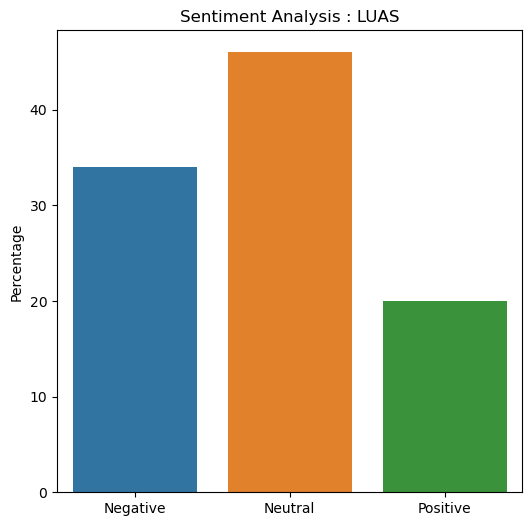

In [202]:
#Bar Graph. 
#In order to visualize the difference of positive, negative and neutral comments in the analysis and to see that the predominant one was the negative one. 
fig,ax=plt.subplots(figsize=(6,6))

counts=df.label.value_counts(normalize=True)*100
sns.barplot(x=counts.index, y=counts, ax=ax)

plt.title('Sentiment Analysis : LUAS')

ax.set_xticklabels(['Negative','Neutral','Positive'])
ax.set_ylabel("Percentage")

plt.show()

<Figure size 600x600 with 0 Axes>

<Axes: ylabel='label'>

Text(0.5, 1.0, 'Sentiment Analysis : LUAS')

Text(0, 0.5, '')

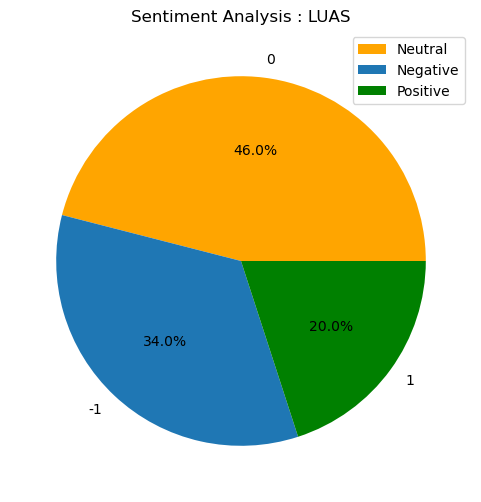

In [360]:
#Pie chart with normalized percentage of values
plt.figure(figsize=(6, 6))
counts.plot(kind='pie', autopct='%1.1f%%', colors=['orange', 'tab:blue', 'green'])
labels = {1: 'Positive', -1: 'Negative', 0: 'Neutral'}

plt.title('Sentiment Analysis : LUAS')

plt.ylabel('')
plt.legend(labels=[labels[i] for i in counts.index], loc='upper right')
plt.show()

# Word frequency

Plot the word cloud for all the key words without prepocessing it 

In [204]:
all_headlines = ' '.join(headlines)

In [205]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [206]:
from wordcloud import WordCloud 

In [207]:
wordcloud = WordCloud(random_state=21, max_font_size=119).generate(all_headlines)

<Figure size 1900x1000 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

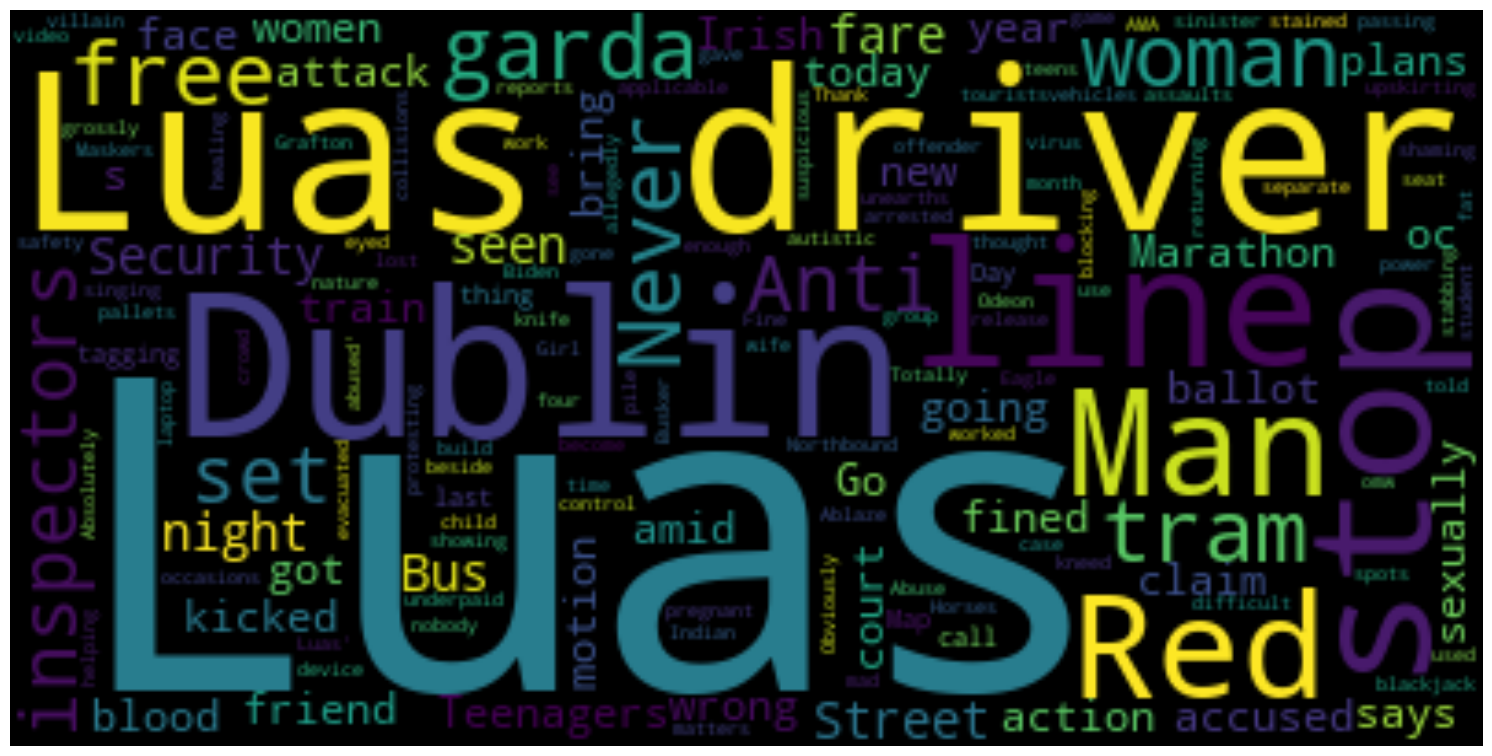

In [208]:
plt.figure(figsize=(19, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Reinforcement Learning

In [252]:
df2

,headlines,label
0,The Luas passing the Odeon,0
1,They set the Luas Ablaze,0
2,Teenagers the luas,0
3,Busker singing you've got a friend to an autis...,1
4,Eagle-eyed garda spots upskirting offender on ...,-1
...,...,...
95,Blackhorse Luas Stop,-1
96,luas drivers are fucking c****!,0
97,Seen at Charlemont luas stop,-1
98,Luas Rant,-1


In [250]:
Re_Le = df2.drop('headlines', axis=1)

In [253]:
# Random Selection

# Importing the dataset
dataset = Re_Le

# Implementing Random Selection
import random
N = 100
d = 1
ads_selected = []
total_reward = 0
for n in range(0, N):
    ad = random.randrange(d)
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    #print(n, "\t", ad, "\t", reward, "\t")
    total_reward = total_reward + reward

# Total reward
print(total_reward)

-14


In [254]:
pd.Series(ads_selected).tail(1000).value_counts(normalize = True)

0    1.0
dtype: float64

In [255]:
# Implementing UCB
import math
N = 100
d = 1
ads_selected          = []
numbers_of_selections = [0] * d
sums_of_reward        = [0] * d
total_reward          = 0

for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if (numbers_of_selections[i] > 0):
            average_reward = sums_of_reward[i] / numbers_of_selections[i]
            delta_i = math.sqrt(2 * math.log(n + 1) / numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] += 1
    reward = dataset.values[n, ad]
    sums_of_reward[ad] += reward
    total_reward += reward

# Total reward
print(total_reward)

-14


In [256]:
pd.Series(ads_selected).tail(1500).value_counts(normalize = True)

0    1.0
dtype: float64

(array([  0.,   0.,   0.,   0.,   0., 100.,   0.,   0.,   0.,   0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Histogram of ads selections')

Text(0.5, 0, 'Ads')

Text(0, 0.5, 'Number of times each ad was selected')

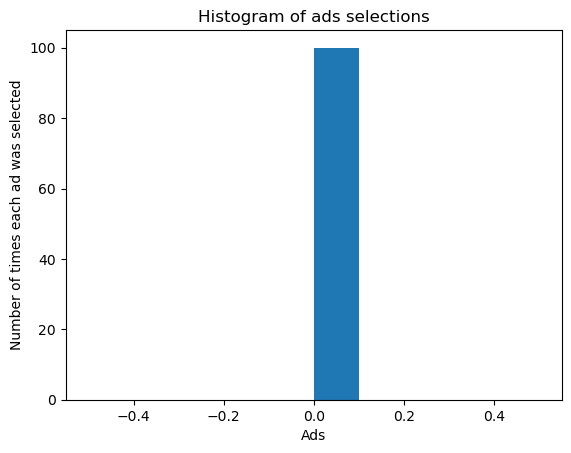

In [257]:
#We visualise the model to identify the add

plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

# NORWAY-Sentiment Analysis 

In [288]:
subreddit = reddit.subreddit("norway")
from datetime import datetime as dt

Lists to store post titles, comments, and timestamps

In [289]:
postTitles = []
postComments = []
commentTimes = []

In [290]:
for post in subreddit.search('T-bane', limit=10):
    post.comment_sort = 'best'  # Ordenar comentarios por 'best' para obtener los mejores comentarios primero
    post.comment_limit = None   # Sin límite en la cantidad de comentarios

    for comment in post.comments:
        if isinstance(comment, praw.models.MoreComments):
            continue  # Saltar comentarios adicionales no cargados completamente

        postTitles.append(post.title)
        postComments.append(comment.body)
        commentTimes.append(dt.fromtimestamp(comment.created_utc))

In [291]:
postsDict = {}
for post in subreddit.new(limit=10):
    postsDict[post.title] = []
    for comment in list(post.comments):
        postsDict[post.title].append({
            "comment":comment.body,
            "time": str(dt.fromtimestamp(comment.created_utc))
        })

# Importing information in json format

In [292]:
import json

In [293]:
postsDict

{'Is the custom on taking your shoes off both at home, school or in certain establishments commonly practiced in Norway?': [{'comment': "It's only really at home that we do it",
   'time': '2024-01-04 15:24:58'},
  {'comment': 'Home yes (its very rude to walk into someone hpuse with shoes on) kindergarden and elementary school yes shoes off. They have spesific places to put them in the hallways. Highschool no. Restaurants no.',
   'time': '2024-01-04 15:38:59'}],
 'Month to Month SIM Card or Data Plan in Norway': [{'comment': 'Are you looking for prepaid or postpaid?  Most companies should have subscriptions without any long-term contract.  You can find some listed here: https://forbrukernet.com/mobilabonnement/billigste-mobilabonnementer/\n\nLook for “bindingstid: Nei” for the plans that don’t lock you in to a long-term contract (unusual here)',
   'time': '2024-01-04 13:29:42'},
  {'comment': "The only time you can expect fixed term contracts at norwegian phone operators is if you pu

In [294]:
data = json.dumps(postsDict)

In [295]:
with open("reddit data NWDF.json", "w") as f:
    f.write(data)

13365

In [296]:
NWDF=pd.DataFrame({
    "Post Title":postTitles,
    "Comment": postComments,
    "Comment Time": commentTimes
})

In [297]:
NWDF.head()

,Post Title,Comment,Comment Time
0,Abou the T-bane,I find the T-bane door openers to be quite goo...,2023-01-16 16:36:05
1,Abou the T-bane,Former driver here: the button indicates that ...,2023-01-17 04:34:55
2,Abou the T-bane,I never understood this. The doors are program...,2023-01-16 14:36:41
3,Abou the T-bane,"Oh, people misunderstand this every day. I lik...",2023-01-16 19:12:25
4,Abou the T-bane,Just rip it open like a man.,2023-01-16 13:21:17


# Saving data in .csv format

In [298]:
NWDF.to_csv('reddit_T-bane.cvs',index=False)

In [299]:
NWDF2= pd.read_csv('reddit_T-bane.cvs')

In [300]:
NWDF2 = NWDF2.drop_duplicates()

In [307]:
sentiment_scores = NWDF2['Comment'].apply(lambda x: sia.polarity_scores(x))

# DataFrame with the results of the sentiment analysis
sentiment_df = pd.DataFrame(list(sentiment_scores))
sentiment_df['Comment'] = NWDF2['Comment']

sentiment_df.head()

,neg,neu,pos,compound,Comment
0,0.084,0.799,0.117,0.6053,I find the T-bane door openers to be quite goo...
1,0.083,0.864,0.052,-0.2617,Former driver here: the button indicates that ...
2,0.129,0.871,0.000,-0.7096,I never understood this. The doors are program...
3,0.075,0.858,0.067,-0.2023,"Oh, people misunderstand this every day. I lik..."
4,0.000,0.667,0.333,0.3612,Just rip it open like a man.


In [317]:
sentiment_df['label']=0
sentiment_df.loc[df['compound']>0.2,'label']=1
sentiment_df.loc[df['compound']<-0.2,'label']=-1
sentiment_df.head()

,neg,neu,pos,compound,Comment,label
0,0.084,0.799,0.117,0.6053,I find the T-bane door openers to be quite goo...,0
1,0.083,0.864,0.052,-0.2617,Former driver here: the button indicates that ...,0
2,0.129,0.871,0.000,-0.7096,I never understood this. The doors are program...,0
3,0.075,0.858,0.067,-0.2023,"Oh, people misunderstand this every day. I lik...",1
4,0.000,0.667,0.333,0.3612,Just rip it open like a man.,-1


In [318]:
sentiment_NW= sentiment_df[['Comment','label']]
sentiment_NW.to_csv('sentiment_NW.cvs', mode='a',encoding='utf-8',index=False)

# Text Analytics & NLP

In [338]:
#cheking rows and confirm that there are no missing values.

In [337]:
sentiment_NW.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 0 to 54
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  54 non-null     object
 1   label    54 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ KB


In [339]:
#Check for duplicate rows in the dataset.

In [325]:
sentiment_NW.groupby('label').describe()

Comment                                                               
        count unique                                                top freq
label                                                                       
-1         24     24                       Just rip it open like a man.    1
 0         18     17                                          [deleted]    2
 1         13     13  Oh, people misunderstand this every day. I lik...    1

In [326]:
sentiment_NW = sentiment_NW.drop_duplicates()
sentiment_NW.groupby('label').describe()

Comment                                                               
        count unique                                                top freq
label                                                                       
-1         24     24                       Just rip it open like a man.    1
 0         17     17  I find the T-bane door openers to be quite goo...    1
 1         13     13  Oh, people misunderstand this every day. I lik...    1

In [340]:
#min_df by 5 to ignore words that appear less than 5 times in the training text corpus. It reduces the likelihood of memory errors and will probably also make the model more accurate. 

In [330]:
vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english', min_df=5)
x = vectorizer.fit_transform(sentiment_NW['Comment'])
y = sentiment_NW['label']

In [341]:
#text is vectorized 

In [347]:
text = vectorizer.transform(['I find the T-bane door openers to be quite good'])
text = vectorizer.inverse_transform(text)
print(text)

[array(['bane'], dtype='<U9')]


In [348]:
#Split the dataset for training and testing.

In [349]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)  

# Train a logistic-regression model

In [350]:
#Train a classifier.
#fit a model to the data.

In [351]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 1000, random_state = 0)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [352]:
#Validation of the trained model with 50% of the data set reserved for testing and show a confusion matrix.

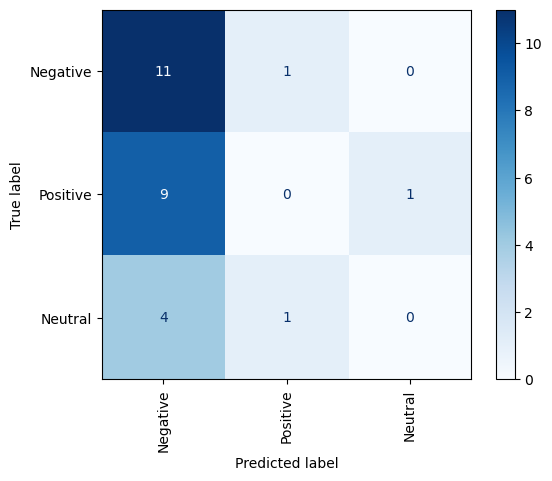

In [353]:
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd

cmd.from_estimator(model, x_test, y_test,
                   display_labels=['Negative', 'Positive','Neutral'],
                   cmap='Blues', xticks_rotation='vertical')

The model correctly identified 11 negative reviews while misclassifying 0 of them. It correctly identified 9 positive reviews and got it wrong 0 times.

# Using the model to analyze text

In [357]:
review = "Transport in Oslo is very slow and expensive"
model.predict_proba(vectorizer.transform([review]))[0][1]

0.11581335329383571